In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas ayarlarƒ±nƒ± geni≈ületme
pd.set_option('display.max_columns', None) 
# pd.set_option('display.max_rows', None) 

# 1. üì¶ VERƒ∞ √ñN ƒ∞≈ûLEME

## 1.1 Veri Genel Bilgisi ve T√ºrleri

In [2]:
df = pd.read_csv(r"C:\Users\90535\Desktop\Ali Murat\datas\benim verim\2010-2019 Fall Marathons_Results.csv")

In [3]:
df.head()

Race  Year                Name Gender  Age  Finish Age Bracket
0  Columbus Marathon  2015      Becky Williams      F   29   13645    Under 35
1  Columbus Marathon  2015     Jessica Sheahan      F   27   13648    Under 35
2  Columbus Marathon  2015        Kelsey Stief      F   27   13650    Under 35
3  Columbus Marathon  2015        Mehgan Cline      F   26   13650    Under 35
4  Columbus Marathon  2015  Stefanie Driesenga      F   28   13652    Under 35

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053366 entries, 0 to 2053365
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Race         object
 1   Year         int64 
 2   Name         object
 3   Gender       object
 4   Age          int64 
 5   Finish       int64 
 6   Age Bracket  object
dtypes: int64(3), object(4)
memory usage: 109.7+ MB


In [5]:
df.describe().round(3)

Year          Age       Finish
count  2053366.000  2053366.000  2053366.000
mean      2014.416       39.193    16517.795
std          2.833       12.079     3366.605
min       2010.000       -9.000     7425.000
25%       2012.000       31.000    14080.000
50%       2014.000       39.000    16135.000
75%       2017.000       48.000    18553.000
max       2019.000      116.000    73460.000

## 1.2 Eksik Deƒüer Analizi ve Temizleme

In [6]:
# Eksik deƒüer kontrol√º
print("\nüí° Eksik Deƒüerler:\n", df.isnull().sum())


üí° Eksik Deƒüerler:
 Race           0
Year           0
Name           2
Gender         8
Age            0
Finish         0
Age Bracket    0
dtype: int64


In [7]:
# Eksik ve gereksiz verileri ineceleme
df["Age"].unique()

array([ 29,  27,  26,  28,  44,  24,  25,  36,  22,  45,  61,  57,  37,
        49,  31,  35,  30,  21,  23,  38,  18,  59,  34,  20,  32,  42,
        33,  48,  19,  46,  40,  51,  41,  50,  47,  43,  39,  66,  53,
        54,  16,  62,  58,  56,  55,  72,  65,  60,  52,  71,  64,  -1,
        63,  69,  67,  73,  70,  14,  74,  68,  76,  79,  78,  84,  99,
        17,  11,  15,  75,  77,  13,  90,  80,  98,   9,  81,  12,  10,
        82,  83,   5,  86,   1,  85,   8,  88,  91, 116,  87,  89,   0,
         6,  94,   2,   7,  -9], dtype=int64)

In [8]:
# Genel maraton katƒ±lƒ±mcƒ±larƒ± ya≈ü aralƒ±ƒüƒ± ara≈ütƒ±rmasƒ±na dayanarak: 
# Ya≈ü sƒ±nƒ±rlarƒ±nƒ± belirleyelim: 
min_age = 13 
max_age = 100 

# Ya≈üƒ± 13'ten k√º√ß√ºk veya 100'den b√ºy√ºk olan katƒ±lƒ±mcƒ±larƒ±n ya≈ülarƒ±nƒ± NaN (eksik deƒüer) olarak ayarlƒ±yoruz
df.loc[(df['Age'] < min_age) | (df['Age'] > max_age), 'Age'] = np.nan

In [9]:
# Name s√ºtununda eksik verileri 'Unknown' ile doldur
df['Name'] = df['Name'].fillna('Unknown')

# "Gender" s√ºtunundaki bo≈ü deƒüerleri, en sƒ±k g√∂r√ºlen deƒüer (mode) ile doldur
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# 'Under 35' ya≈ü grubunun medyan deƒüeri
under_35_age_median = df[df['Age Bracket'] == 'Under 35']['Age'].median()

# '80 and Over' ya≈ü grubunun medyan deƒüeri
over_80_age_median = df[df['Age Bracket'] == '80 and Over']['Age'].median()

# NaN olan 'Age' deƒüerlerini ya≈ü aralƒ±klarƒ±na g√∂re medyan deƒüerler ile dolduruyoruz
df.loc[(df['Age'].isnull()) & (df['Age Bracket'] == 'Under 35'), 'Age'] = under_35_age_median
df.loc[(df['Age'].isnull()) & (df['Age Bracket'] == '80 and Over'), 'Age'] = over_80_age_median

## 1.3 U√ß Deƒüer (Outlier) Analizi

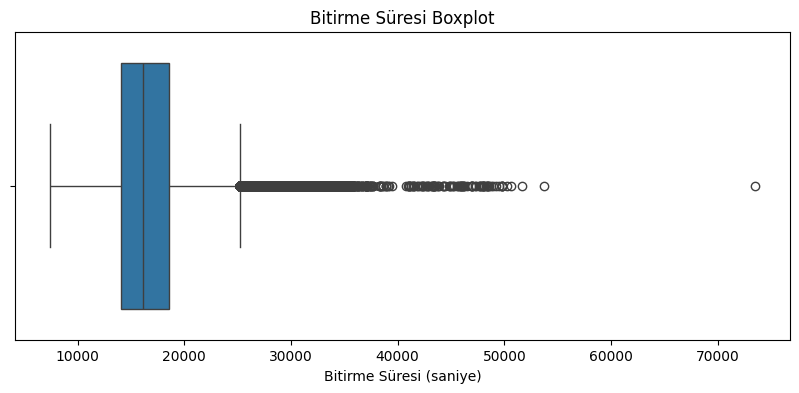

In [10]:
# Finish s√ºresi boxplot ile g√∂rselle≈ütirme
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='Finish')
plt.title("Bitirme S√ºresi Boxplot")
plt.xlabel("Bitirme S√ºresi (saniye)")
plt.show()

Makine √∂ƒürenmesi modellerinde u√ß deƒüerlerin tahminleri olumsuz etkileyebileceƒüi g√∂z √∂n√ºnde bulundurularak, aykƒ±rƒ± deƒüerler √ßƒ±karma ve Winsorize y√∂ntemiyle d√ºzeltilmi≈ü varyasyonlar olu≈üturulmu≈ütur.

In [11]:
# Aykƒ±rƒ± deƒüerlerin IQR y√∂ntemi ile tespiti
Q1 = df['Finish'].quantile(0.25)
Q3 = df['Finish'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Finish'] < lower_bound) | (df['Finish'] > upper_bound)]
print("Aykƒ±rƒ± deƒüer sayƒ±sƒ±:", len(outliers))

Aykƒ±rƒ± deƒüer sayƒ±sƒ±: 24148


In [12]:
# Aykƒ±rƒ± deƒüerleri √ßƒ±karma
df_cleaned = df[(df['Finish'] >= lower_bound) & (df['Finish'] <= upper_bound)]

# Aykƒ±rƒ± deƒüerleri g√∂zden ge√ßirme
print(f"Orijinal ortalama: {df['Finish'].mean():.2f}")
print(f"Ortalama bitirme s√ºresi (temizlenmi≈ü veri): {df_cleaned['Finish'].mean() : .2F}")

Orijinal ortalama: 16517.80
Ortalama bitirme s√ºresi (temizlenmi≈ü veri):  16393.63


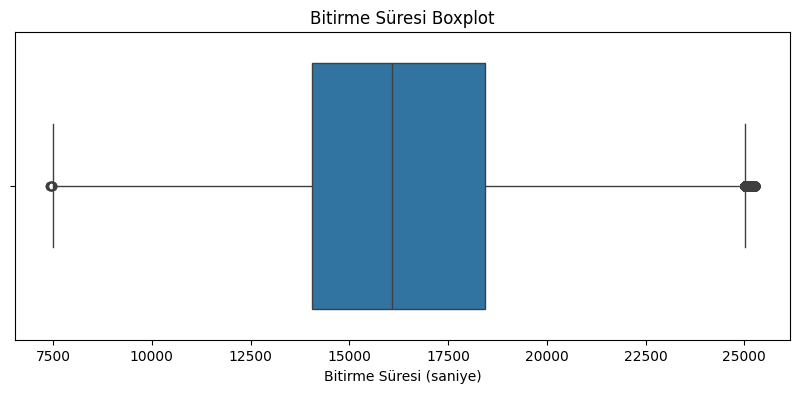

In [13]:
# Aykƒ±rƒ± deƒüerleri √ßƒ±karma Y√∂ntemi ile Bitirme S√ºresi(Finish) Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_cleaned, x='Finish')
plt.title("Bitirme S√ºresi Boxplot")
plt.xlabel("Bitirme S√ºresi (saniye)")
plt.show()

In [14]:
# Winsorizing: alt sƒ±nƒ±rdan k√º√ß√ºkleri alt sƒ±nƒ±ra, √ºst sƒ±nƒ±rdan b√ºy√ºkleri √ºst sƒ±nƒ±ra kƒ±rp
df_winsorized = df.copy()
df_winsorized['Finish'] = df_winsorized['Finish'].clip(lower=lower_bound, upper=upper_bound)

# Kar≈üƒ±la≈ütƒ±rma
print(f"Orijinal ortalama: {df['Finish'].mean():.2f}")
print(f"Winsorized ortalama (kƒ±rpma): {df_winsorized['Finish'].mean():.2f}")

Orijinal ortalama: 16517.80
Winsorized ortalama (kƒ±rpma): 16497.93


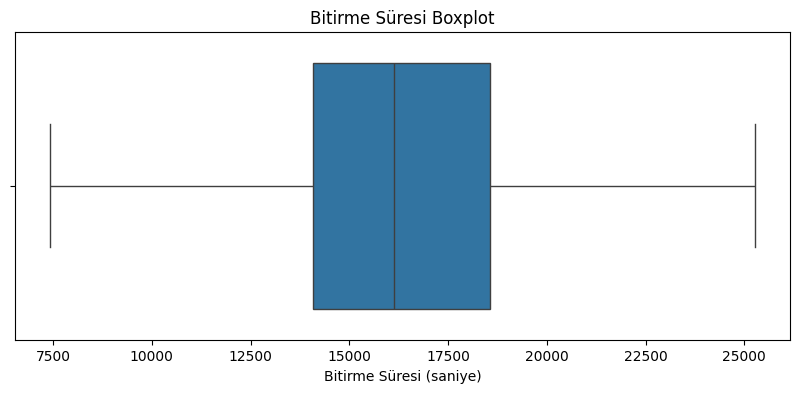

In [15]:
# Winsorizing Y√∂ntemi ile Bitirme S√ºresi(Finish) Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_winsorized, x='Finish')
plt.title("Bitirme S√ºresi Boxplot")
plt.xlabel("Bitirme S√ºresi (saniye)")
plt.show()


--- ƒ∞statistiksel Kar≈üƒ±la≈ütƒ±rmalar ---
Orijinal Ortalama: 16517.80
Temizlenmi≈ü Ortalama: 16393.63
Winsorized Ortalama: 16497.93


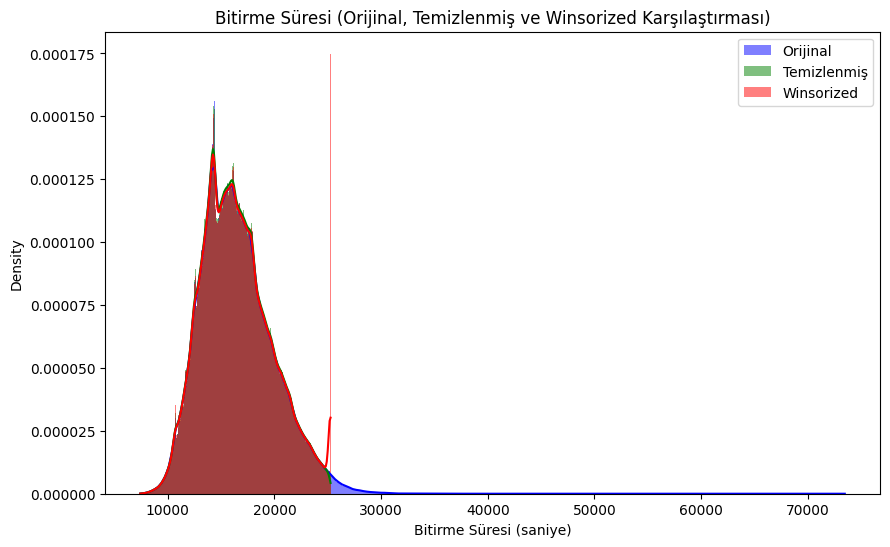

In [16]:
# SONU√áLARIN KIYASLANMASI VE ƒ∞LERƒ∞ ADIMLAR
# ƒ∞statistiksel kar≈üƒ±la≈ütƒ±rma: Orijinal, temizlenmi≈ü ve Winsorized veri arasƒ±ndaki farklarƒ± g√∂zlemleme
print("\n--- ƒ∞statistiksel Kar≈üƒ±la≈ütƒ±rmalar ---")
print(f"Orijinal Ortalama: {df['Finish'].mean():.2f}")
print(f"Temizlenmi≈ü Ortalama: {df_cleaned['Finish'].mean():.2f}")
print(f"Winsorized Ortalama: {df_winsorized['Finish'].mean():.2f}")

# Veriyi g√∂rselle≈ütirme
plt.figure(figsize=(10, 6))
sns.histplot(df['Finish'], kde=True, color='blue', label='Orijinal', stat='density', linewidth=0)
sns.histplot(df_cleaned['Finish'], kde=True, color='green', label='Temizlenmi≈ü', stat='density', linewidth=0)
sns.histplot(df_winsorized['Finish'], kde=True, color='red', label='Winsorized', stat='density', linewidth=0)
plt.title("Bitirme S√ºresi (Orijinal, Temizlenmi≈ü ve Winsorized Kar≈üƒ±la≈ütƒ±rmasƒ±)")
plt.xlabel("Bitirme S√ºresi (saniye)")
plt.legend()
plt.show()

# 2. üìä KE≈ûƒ∞FSEL VERƒ∞ ANALƒ∞Zƒ∞ (EDA)

## 2.1 DAƒûILIM G√ñRSELLE≈ûTƒ∞RMELERƒ∞

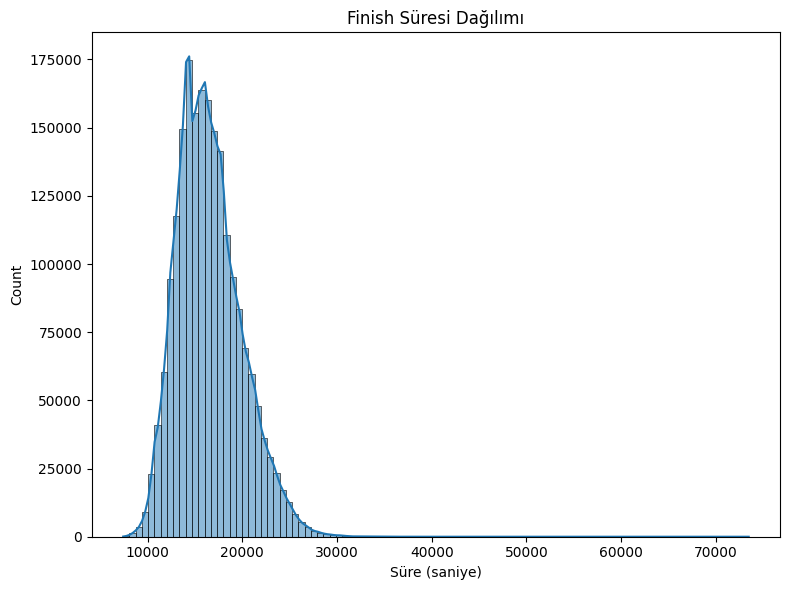

In [17]:
# 2.1.1 Finish S√ºresi Daƒüƒ±lƒ±mƒ±
plt.figure(figsize=(8,6))
sns.histplot(df["Finish"], bins=100, kde=True)
plt.title("Finish S√ºresi Daƒüƒ±lƒ±mƒ±")
plt.xlabel("S√ºre (saniye)")
plt.tight_layout()
plt.show()

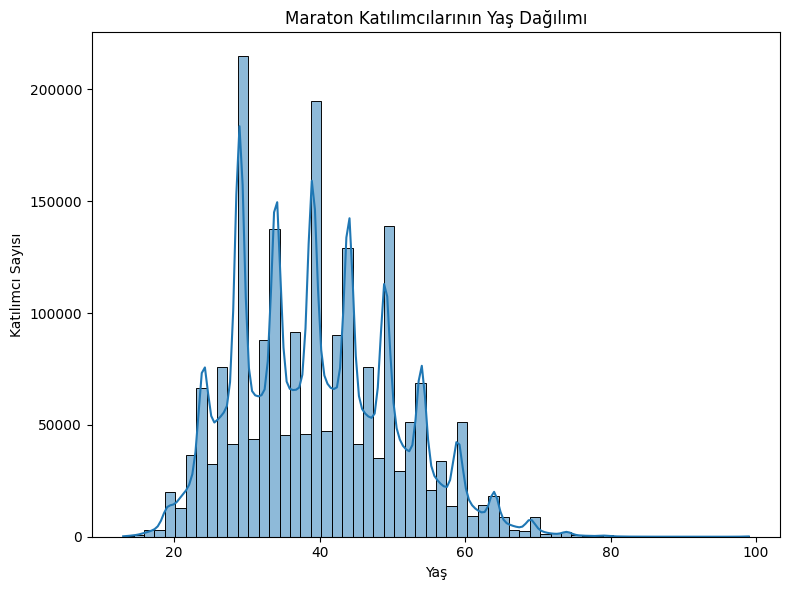

In [18]:
# 2.1.2 Ya≈ü Daƒüƒ±lƒ±mƒ±
plt.figure(figsize=(8,6))
sns.histplot(df["Age"], bins=60, kde=True)
plt.title("Maraton Katƒ±lƒ±mcƒ±larƒ±nƒ±n Ya≈ü Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Ya≈ü")
plt.ylabel("Katƒ±lƒ±mcƒ± Sayƒ±sƒ±")
plt.tight_layout()
plt.show()

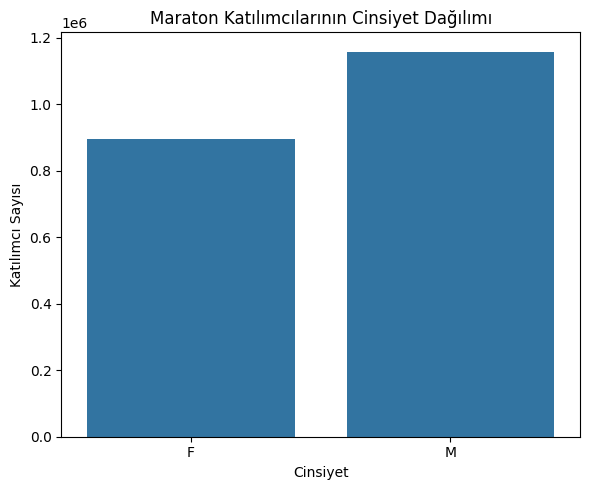

In [19]:
# 2.1.3 Cinsiyet Daƒüƒ±lƒ±mƒ±
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="Gender")
plt.title("Maraton Katƒ±lƒ±mcƒ±larƒ±nƒ±n Cinsiyet Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Cinsiyet")
plt.ylabel("Katƒ±lƒ±mcƒ± Sayƒ±sƒ±")
plt.tight_layout()
plt.show()

## 2.2 Bƒ∞Tƒ∞RME S√úRESƒ∞ ANALƒ∞ZLERƒ∞

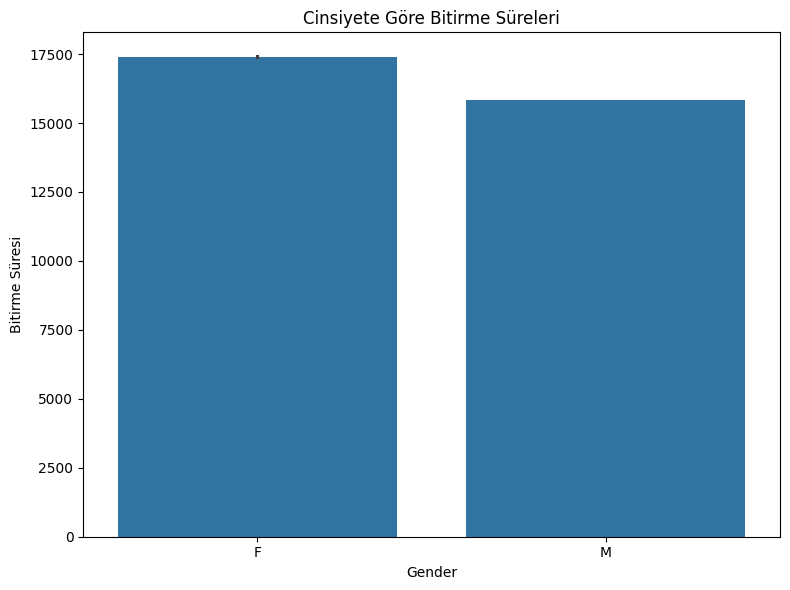

In [20]:
# 2.2.1 Cinsiyete G√∂re Ortalama Bitirme S√ºresi
plt.figure(figsize=(8, 6))
sns.barplot(x="Gender", y="Finish", data=df)
plt.title("Cinsiyete G√∂re Bitirme S√ºreleri")
plt.ylabel("Bitirme S√ºresi")
plt.tight_layout()
plt.show()

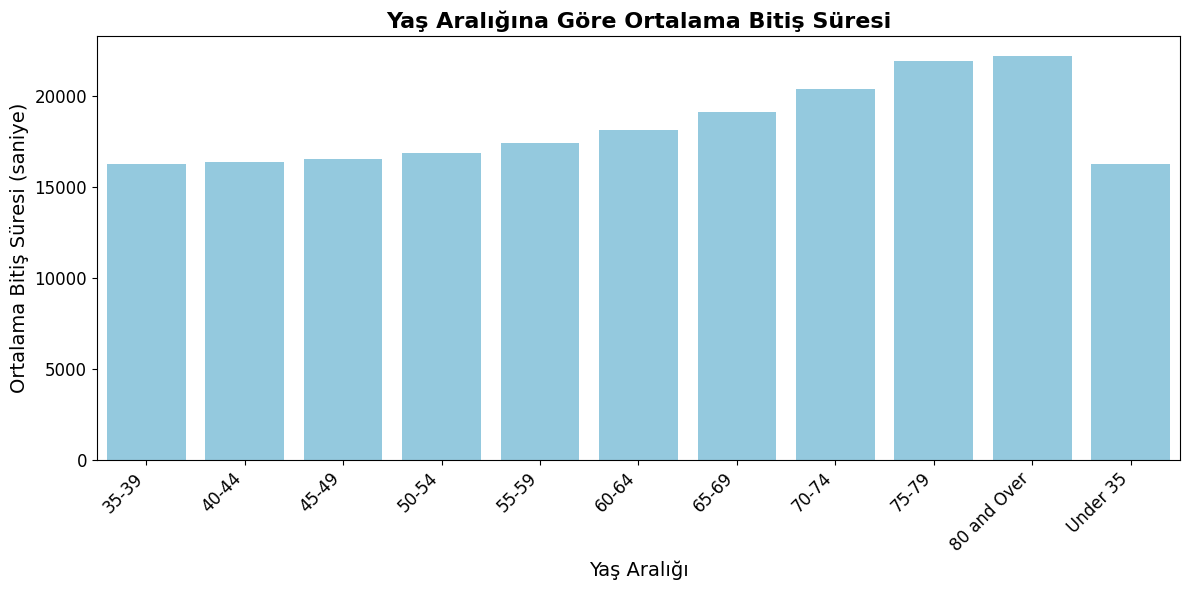

In [21]:
# 2.2.2 Ya≈ü Aralƒ±ƒüƒ±na G√∂re Ortalama Bitirme S√ºresi
plt.figure(figsize=(12, 6))
grouped_Age_Bracket = df.groupby("Age Bracket")["Finish"].mean().reset_index()
sns.barplot(x="Age Bracket", y="Finish", data=grouped_Age_Bracket, color='skyblue')
plt.title("Ya≈ü Aralƒ±ƒüƒ±na G√∂re Ortalama Biti≈ü S√ºresi", fontsize=16, weight='bold')
plt.xlabel("Ya≈ü Aralƒ±ƒüƒ±", fontsize=14)
plt.ylabel("Ortalama Biti≈ü S√ºresi (saniye)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

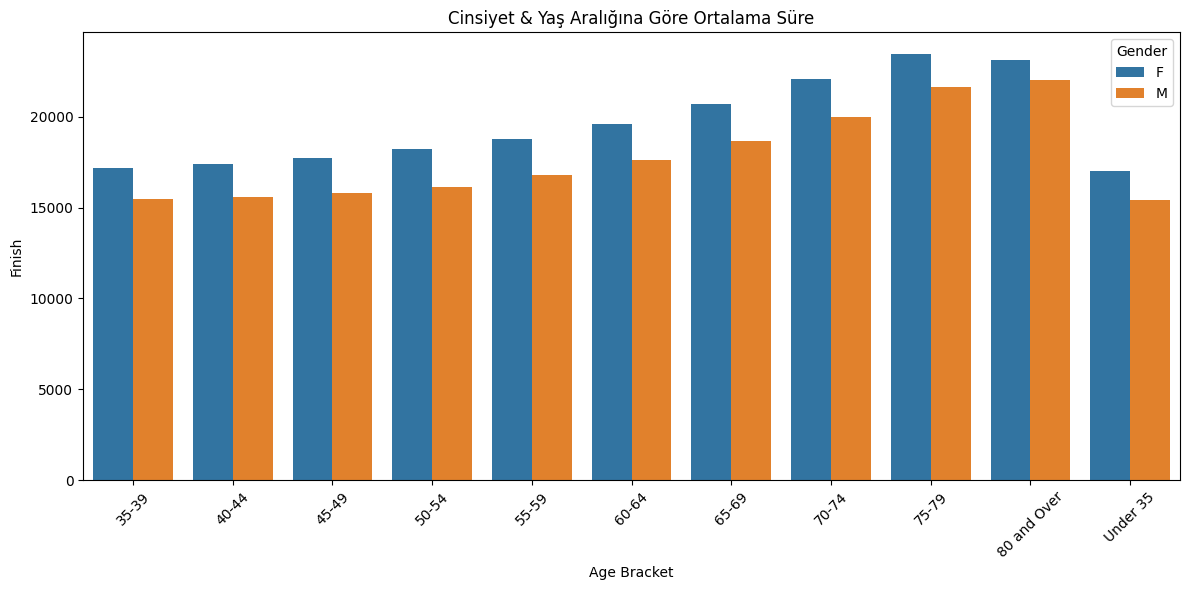

In [22]:
# 2.2.3 Cinsiyet ve Ya≈ü Aralƒ±ƒüƒ±na G√∂re Ortalama S√ºre
plt.figure(figsize=(12,6))
grouped = df.groupby(["Age Bracket", "Gender"])["Finish"].mean().reset_index()
sns.barplot(x="Age Bracket", y="Finish", hue="Gender", data=grouped)
plt.title("Cinsiyet & Ya≈ü Aralƒ±ƒüƒ±na G√∂re Ortalama S√ºre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2.3 ZAMAN SERƒ∞Sƒ∞ ƒ∞NCELEMELERƒ∞

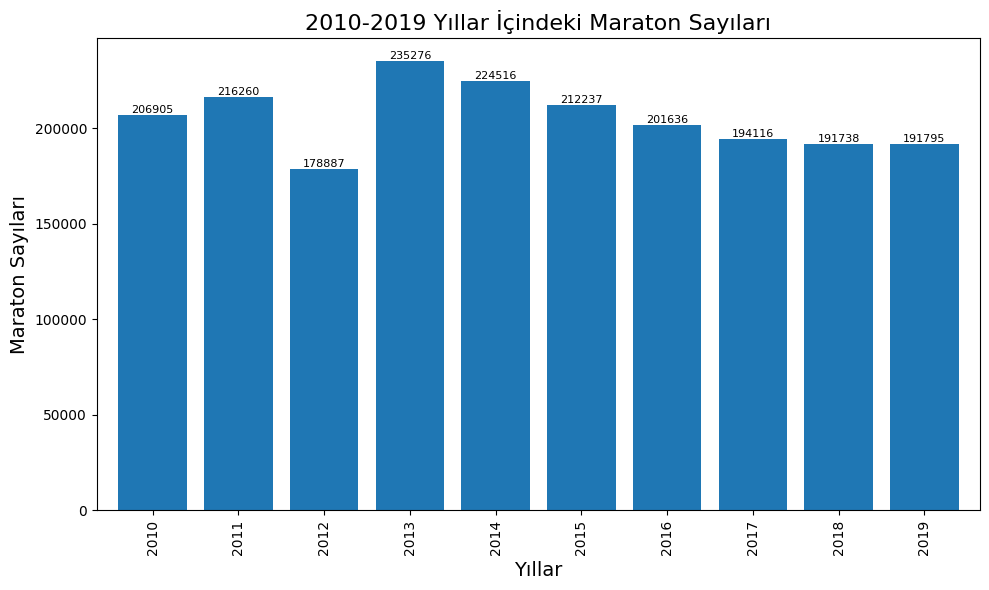

In [23]:
# 2.3.1 Yƒ±llara G√∂re Katƒ±lƒ±mcƒ± Sayƒ±sƒ±
yearly_race_counts = df.groupby("Year")["Race"].count()
yearly_race_counts.plot(kind="bar", figsize=(10, 6), colormap="tab20", width=0.8)
plt.title("2010-2019 Yƒ±llar ƒ∞√ßindeki Maraton Sayƒ±larƒ±", fontsize=16)
plt.xlabel("Yƒ±llar", fontsize=14)
plt.ylabel("Maraton Sayƒ±larƒ±", fontsize=14)
for i, value in enumerate(yearly_race_counts):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

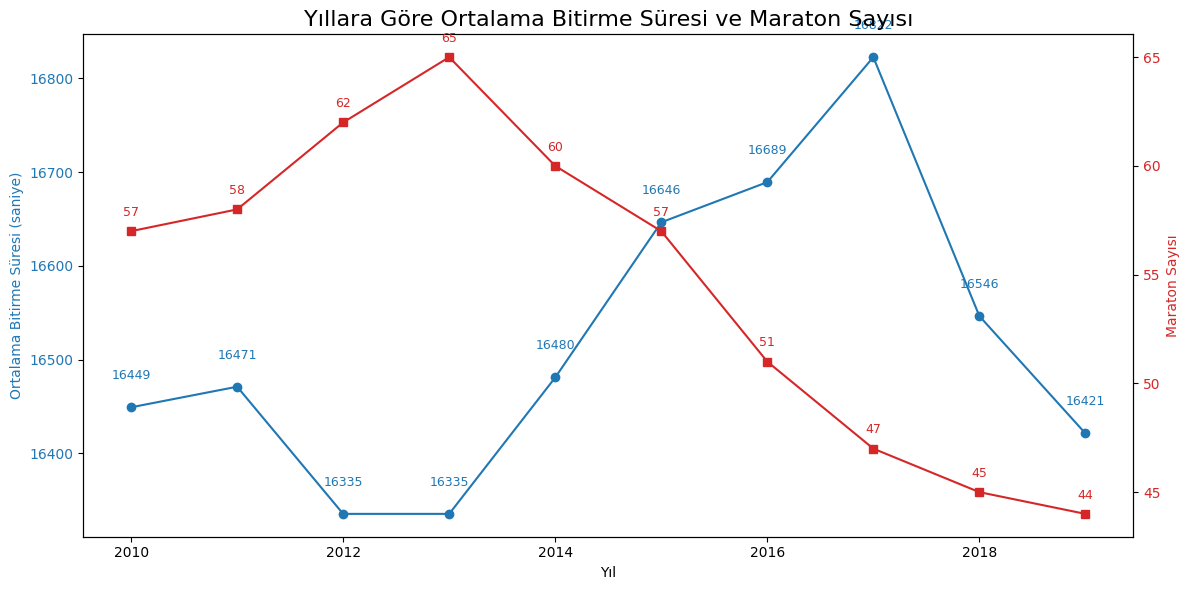

In [24]:
# 2.3.2 Yƒ±llara G√∂re Ortalama Bitirme S√ºresi
finish_year = df.groupby("Year")["Finish"].mean()
# 2.3.3 Yƒ±llara G√∂re Yarƒ±≈ü Sayƒ±sƒ±
marathon_count_per_year = df.groupby("Year")["Race"].nunique()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Ortalama bitirme s√ºresi (sol eksen)
ax1.plot(finish_year.index, finish_year.values, color='tab:blue', marker='o', label="Ortalama Bitirme S√ºresi")
ax1.set_xlabel("Yƒ±l")
ax1.set_ylabel("Ortalama Bitirme S√ºresi (saniye)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
for x, y in zip(finish_year.index, finish_year.values):
    ax1.text(x, y + 30, f"{int(y)}", color='tab:blue', fontsize=9, ha='center')

# Maraton sayƒ±sƒ± (saƒü eksen)
ax2 = ax1.twinx()
ax2.plot(marathon_count_per_year.index, marathon_count_per_year.values, color='tab:red', marker='s', label="Maraton Sayƒ±sƒ±")
ax2.set_ylabel("Maraton Sayƒ±sƒ±", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
for x, y in zip(marathon_count_per_year.index, marathon_count_per_year.values):
    ax2.text(x, y + 0.7, f"{y}", color='tab:red', fontsize=9, ha='center')

plt.title("Yƒ±llara G√∂re Ortalama Bitirme S√ºresi ve Maraton Sayƒ±sƒ±", fontsize=16)
plt.tight_layout()
plt.show()


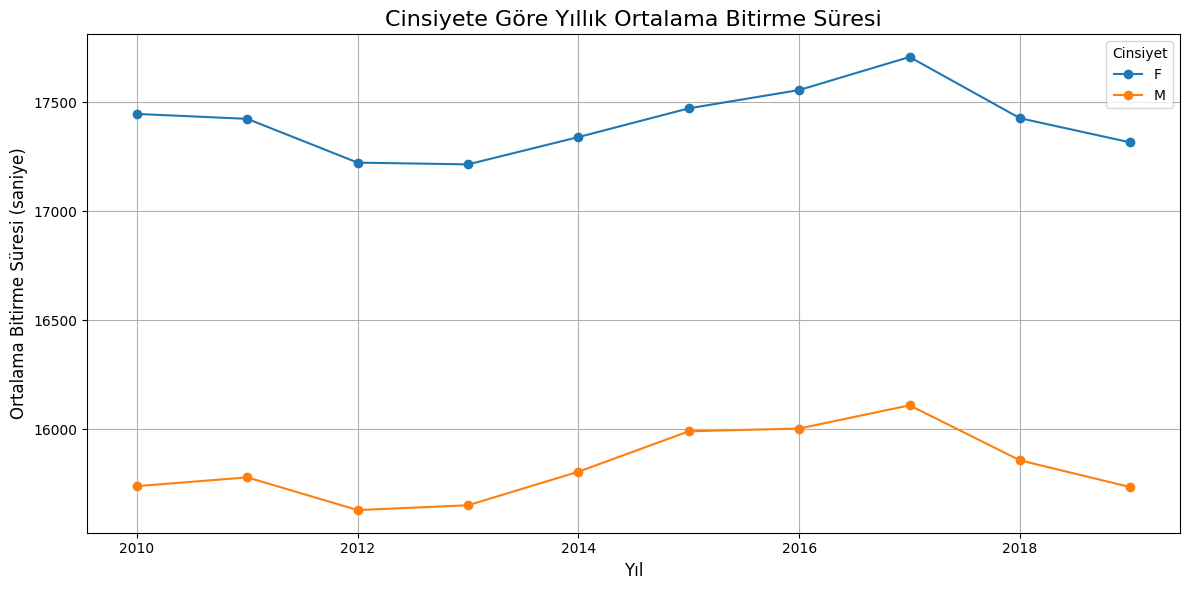

In [25]:
# 2.3.4 Cinsiyete G√∂re Yƒ±llƒ±k Ortalama Bitirme S√ºresi
gender_finish_year = df.groupby(["Year", "Gender"])["Finish"].mean().unstack()
plt.figure(figsize=(12, 6))
gender_finish_year.plot(kind="line", marker='o', ax=plt.gca())
plt.title("Cinsiyete G√∂re Yƒ±llƒ±k Ortalama Bitirme S√ºresi", fontsize=16)
plt.xlabel("Yƒ±l", fontsize=12)
plt.ylabel("Ortalama Bitirme S√ºresi (saniye)", fontsize=12)
plt.legend(title="Cinsiyet")
plt.grid(True)
plt.tight_layout()
plt.show()

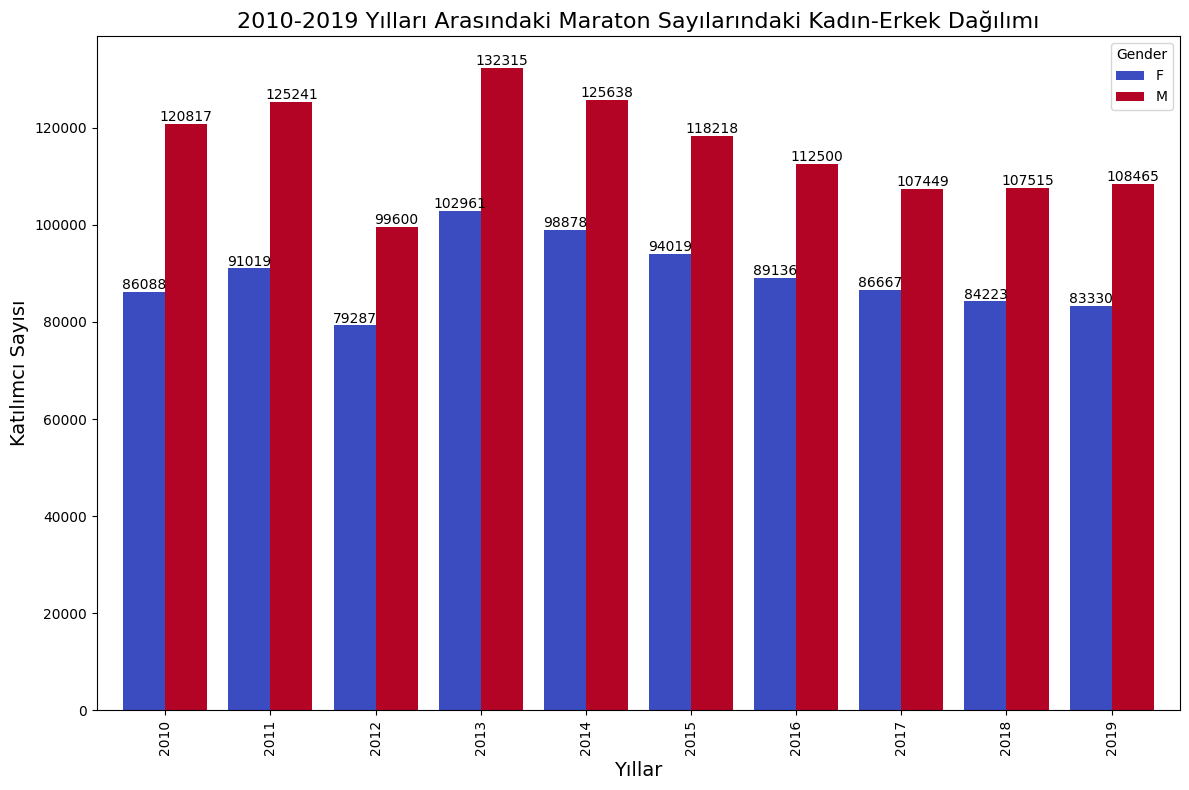

In [26]:
# 2.3.5 Yƒ±l Bazƒ±nda Cinsiyet Daƒüƒ±lƒ±mƒ±
yearly_gender_distribution = df.groupby(["Year", "Gender"]).size().unstack(fill_value=0)
ax = yearly_gender_distribution.plot(kind="bar", figsize=(12, 8), colormap="coolwarm", width=0.8)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title("2010-2019 Yƒ±llarƒ± Arasƒ±ndaki Maraton Sayƒ±larƒ±ndaki Kadƒ±n-Erkek Daƒüƒ±lƒ±mƒ±", fontsize=16)
plt.xlabel("Yƒ±llar", fontsize=14)
plt.ylabel("Katƒ±lƒ±mcƒ± Sayƒ±sƒ±", fontsize=14)
plt.tight_layout()
plt.show()

# 3. üèÅ YARI≈û BAZLI ANALƒ∞ZLER

## 3.1 EN POP√úLER 10 YARI≈ûA G√ñRE ORTALAMA S√úRE

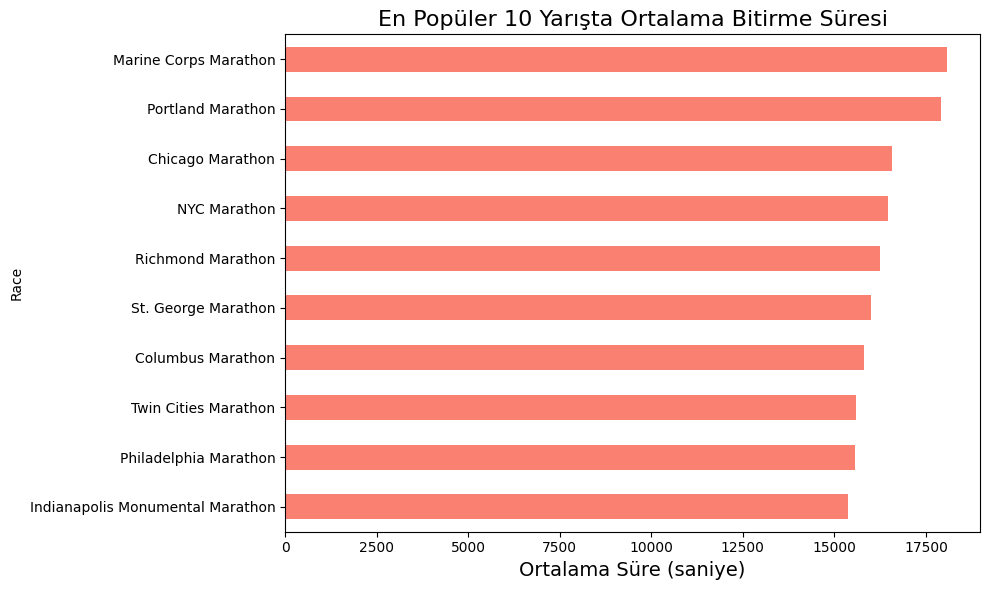

In [27]:
# En pop√ºler 10 yarƒ±≈ü
top_races = df["Race"].value_counts().head(10).index

# Bu yarƒ±≈ülar i√ßin ortalama bitirme s√ºresi
top_race_perf = df[df["Race"].isin(top_races)].groupby("Race")["Finish"].mean().sort_values()

# G√∂rselle≈ütirme
plt.figure(figsize=(10, 6))
top_race_perf.plot(kind="barh", color="salmon")
plt.title("En Pop√ºler 10 Yarƒ±≈üta Ortalama Bitirme S√ºresi", fontsize=16)
plt.xlabel("Ortalama S√ºre (saniye)", fontsize=14)
plt.tight_layout()
plt.show()

## 3.2 EN HIZLI VE EN YAVA≈û 3 YARI≈û

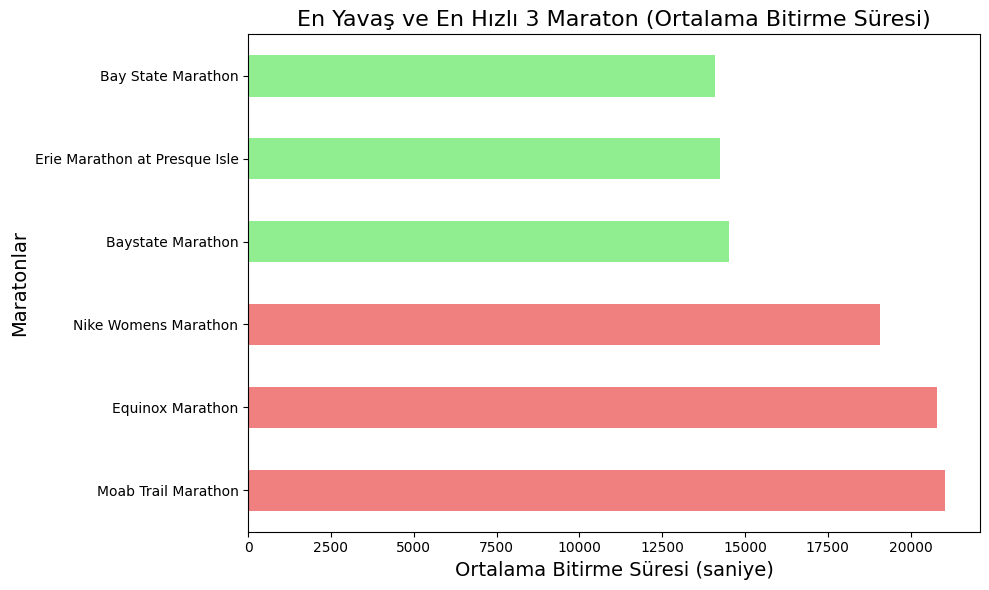

In [28]:
# Her bir maraton i√ßin ortalama bitirme s√ºresi hesaplanƒ±yor
finish_by_marathon = df.groupby("Race")["Finish"].mean()

# En hƒ±zlƒ± 3 maraton (en d√º≈ü√ºk ortalama bitirme s√ºresi)
fastest_marathons = finish_by_marathon.nsmallest(3)

# En yava≈ü 3 maraton (en y√ºksek ortalama bitirme s√ºresi)
slowest_marathons = finish_by_marathon.nlargest(3)

# En hƒ±zlƒ± ve en yava≈ü maratonlarƒ± birle≈ütirip, b√ºy√ºkten k√º√ß√ºƒüe sƒ±ralama
top_and_bottom_marathons = pd.concat([fastest_marathons, slowest_marathons]).sort_values(ascending=False)

# Grafik: En hƒ±zlƒ± ve en yava≈ü maratonlarƒ±n g√∂rselle≈ütirilmesi
plt.figure(figsize=(10, 6))
top_and_bottom_marathons.plot(kind='barh', color=['lightcoral']*3 + ['lightgreen']*3)
plt.title("En Yava≈ü ve En Hƒ±zlƒ± 3 Maraton (Ortalama Bitirme S√ºresi)", fontsize=16)
plt.xlabel("Ortalama Bitirme S√ºresi (saniye)", fontsize=14)
plt.ylabel("Maratonlar", fontsize=14)
plt.tight_layout()
plt.show()

## 3.3 ƒ∞lk 10 yarƒ±≈ü i√ßin katƒ±lƒ±mcƒ± sayƒ±sƒ±

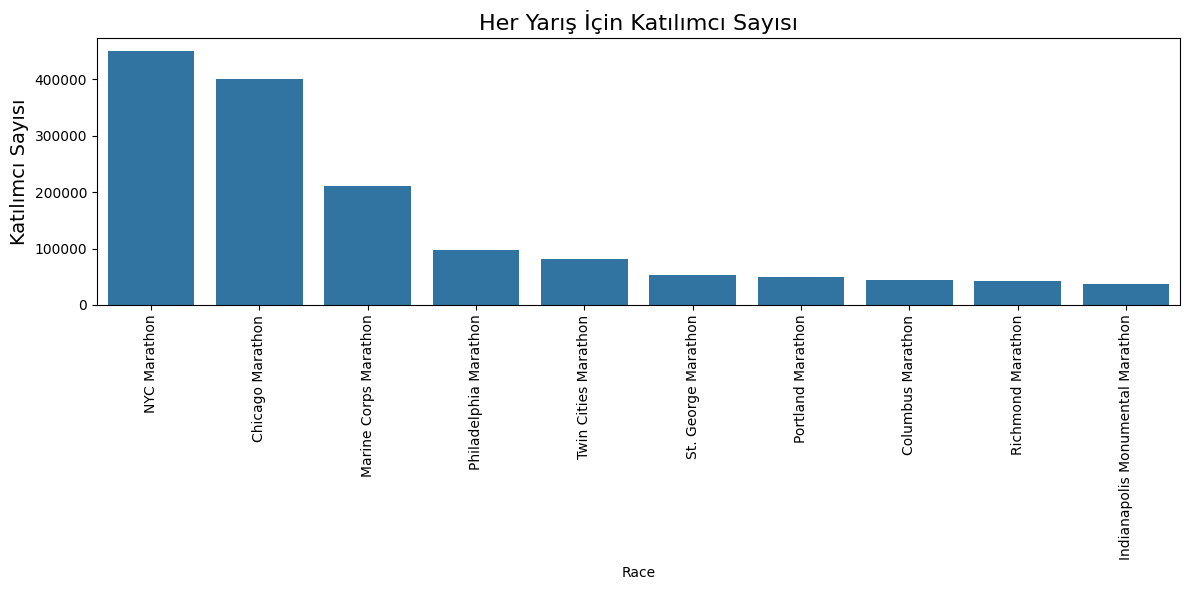

In [29]:
# ƒ∞lk 10 yarƒ±≈ü i√ßin katƒ±lƒ±mcƒ± sayƒ±sƒ±
race_participant_count = df['Race'].value_counts().reset_index().head(10)
race_participant_count.columns = ['Race', 'Participant Count']

# G√∂rselle≈ütirme: Katƒ±lƒ±mcƒ± sayƒ±sƒ±nƒ±n yarƒ±≈ülara g√∂re daƒüƒ±lƒ±mƒ±
plt.figure(figsize=(12, 6))
sns.barplot(x='Race', y='Participant Count', data=race_participant_count)
plt.xticks(rotation=90) 
plt.title('Her Yarƒ±≈ü ƒ∞√ßin Katƒ±lƒ±mcƒ± Sayƒ±sƒ±', fontsize=16)
plt.ylabel('Katƒ±lƒ±mcƒ± Sayƒ±sƒ±', fontsize=14)
plt.tight_layout()
plt.show()


## 3.4 En Pop√ºler 10 Yarƒ±≈ü ƒ∞√ßin Cinsiyet Daƒüƒ±lƒ±mƒ±

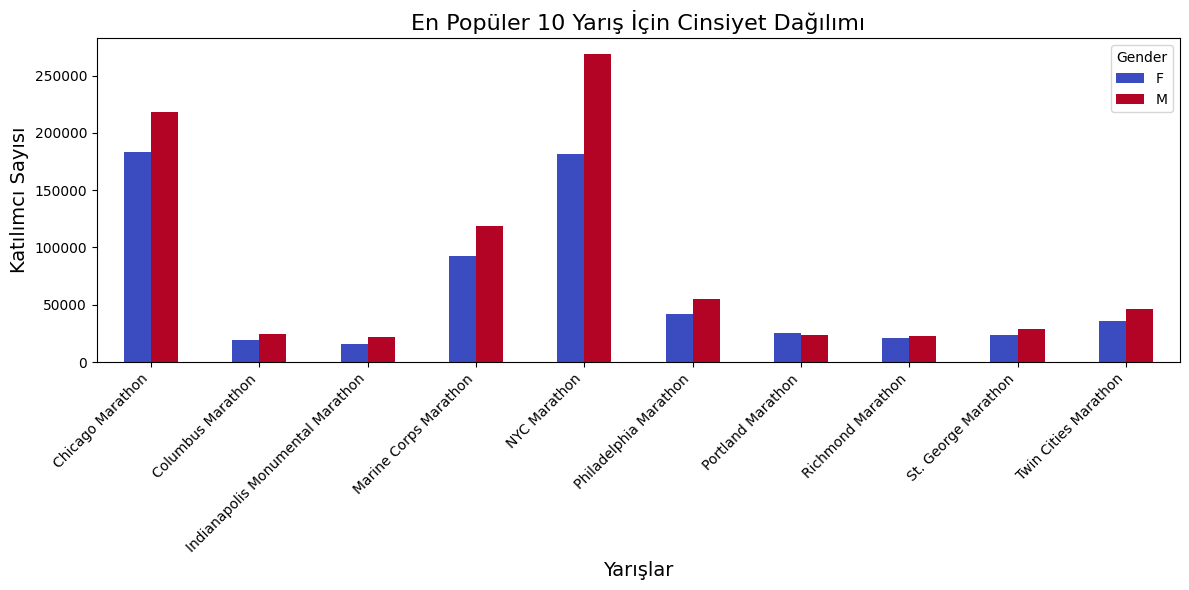

In [30]:
# En pop√ºler 20 yarƒ±≈ü
top_races = df["Race"].value_counts().head(10).index

# Bu yarƒ±≈ülar i√ßin cinsiyet daƒüƒ±lƒ±mƒ±
gender_distribution_top_races = df[df["Race"].isin(top_races)].groupby(["Race", "Gender"]).size().unstack(fill_value=0)

# G√∂rselle≈ütirme: En pop√ºler 10 yarƒ±≈ü i√ßin cinsiyet daƒüƒ±lƒ±mƒ±
gender_distribution_top_races.plot(kind="bar", figsize=(12, 6), colormap="coolwarm")
plt.title('En Pop√ºler 10 Yarƒ±≈ü ƒ∞√ßin Cinsiyet Daƒüƒ±lƒ±mƒ±', fontsize=16)
plt.xlabel('Yarƒ±≈ülar', fontsize=14)
plt.ylabel('Katƒ±lƒ±mcƒ± Sayƒ±sƒ±', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 3.5 En pop√ºler 10 yarƒ±≈ü i√ßin ya≈ü ortalamasƒ±

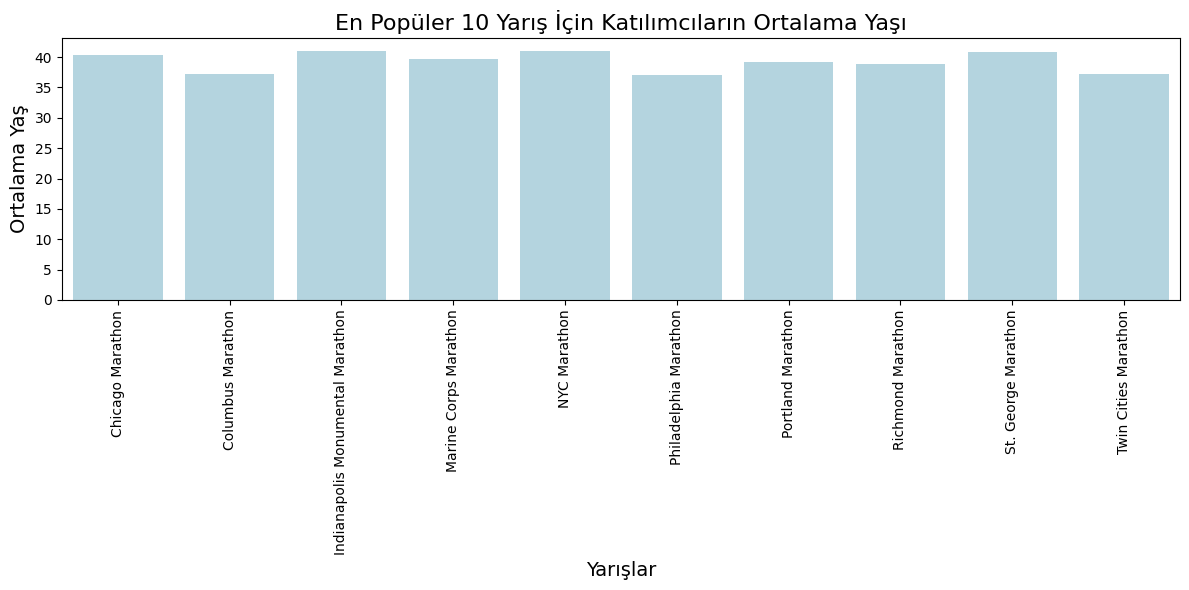

In [31]:
# Ya≈ü daƒüƒ±lƒ±mƒ±nƒ± incelemek i√ßin her yarƒ±≈üƒ±n ya≈ü ortalamasƒ±nƒ± hesaplayalƒ±m
age_by_race = df.groupby('Race')['Age'].mean().reset_index()

# En pop√ºler 10 yarƒ±≈ü i√ßin ya≈ü ortalamalarƒ±nƒ± alalƒ±m
age_by_race_top = age_by_race[age_by_race['Race'].isin(top_races)]

# G√∂rselle≈ütirme: En pop√ºler 10 yarƒ±≈ü i√ßin ya≈ü ortalamasƒ±
plt.figure(figsize=(12, 6))
sns.barplot(x='Race', y='Age', data=age_by_race_top, color='lightblue')
plt.xticks(rotation=90)  # Yarƒ±≈ü isimlerinin g√∂r√ºnmesi i√ßin d√∂nd√ºrme
plt.title('En Pop√ºler 10 Yarƒ±≈ü ƒ∞√ßin Katƒ±lƒ±mcƒ±larƒ±n Ortalama Ya≈üƒ±', fontsize=16)
plt.xlabel('Yarƒ±≈ülar', fontsize=14)
plt.ylabel('Ortalama Ya≈ü', fontsize=14)
plt.tight_layout()
plt.show()

## 3.6 En Hƒ±zlƒ± ve En Yava≈ü Yarƒ±≈ülarƒ±n Yƒ±llara G√∂re Deƒüi≈üimi

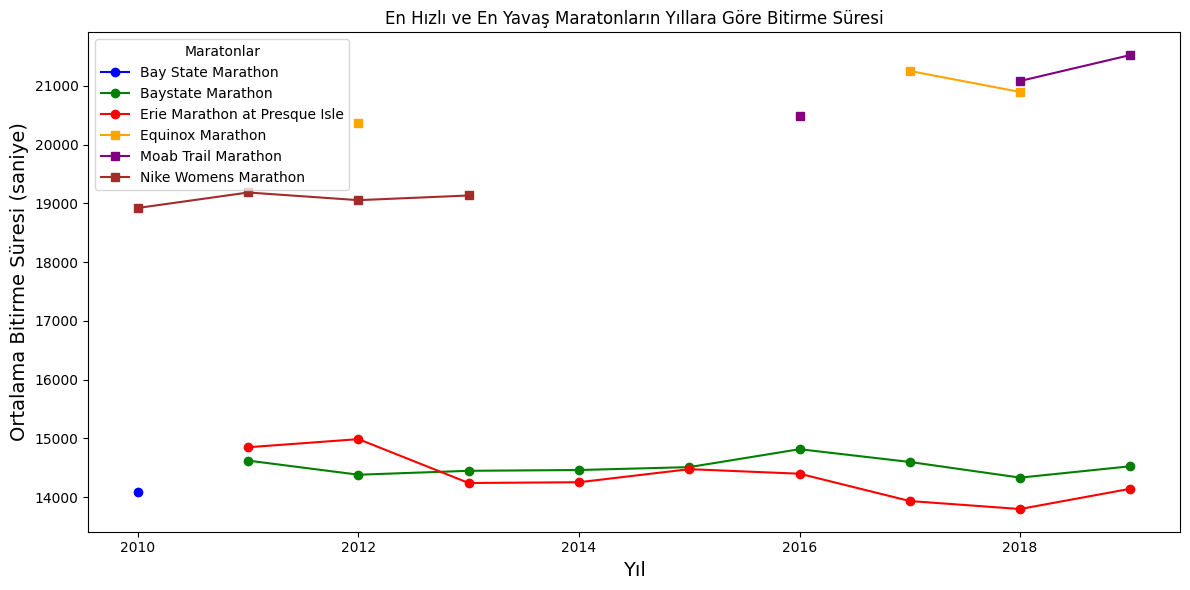

In [32]:
# En hƒ±zlƒ± ve en yava≈ü maratonlarƒ±n yƒ±llara g√∂re bitirme s√ºrelerini inceleyelim
fastest_marathons_yearly = df[df['Race'].isin(fastest_marathons.index)].groupby(['Year', 'Race'])['Finish'].mean().unstack()
slowest_marathons_yearly = df[df['Race'].isin(slowest_marathons.index)].groupby(['Year', 'Race'])['Finish'].mean().unstack()

# G√∂rselle≈ütirme: Yƒ±llara g√∂re en hƒ±zlƒ± ve en yava≈ü yarƒ±≈ülarƒ±n deƒüi≈üimi
plt.figure(figsize=(12, 6))

# En hƒ±zlƒ± maratonlarƒ± √ßiziyoruz
fastest_marathons_yearly.plot(kind='line', marker='o', ax=plt.gca(), title='En Hƒ±zlƒ± ve En Yava≈ü Maratonlarƒ±n Yƒ±llara G√∂re Bitirme S√ºresi', color=['blue', 'green', 'red'])

# En yava≈ü maratonlarƒ± √ßiziyoruz
slowest_marathons_yearly.plot(kind='line', marker='s', ax=plt.gca(), color=['orange', 'purple', 'brown'])

plt.xlabel('Yƒ±l', fontsize=14)
plt.ylabel('Ortalama Bitirme S√ºresi (saniye)', fontsize=14)
plt.legend(title="Maratonlar", loc='upper left')
plt.tight_layout()
plt.show()


# 4. üéØ KO≈ûUCU PROFƒ∞Lƒ∞ ANALƒ∞ZLERƒ∞

## 4.1 Elit ve Zayƒ±f Performans Kar≈üƒ±la≈ütƒ±rmalarƒ±

In [33]:
# En hƒ±zlƒ± %1 ve en yava≈ü %1 analiz
lower_threshold = df["Finish"].quantile(0.01)
upper_threshold = df["Finish"].quantile(0.99)
print(f"\n‚ö° En hƒ±zlƒ± %1 ortalama s√ºre: {df[df['Finish'] <= lower_threshold]['Finish'].mean():.2f} saniye")
print(f"üê¢ En yava≈ü %1 ortalama s√ºre: {df[df['Finish'] >= upper_threshold]['Finish'].mean():.2f} saniye")

# En hƒ±zlƒ± %1 ve en yava≈ü %1 verilerini filtreleme
fastest_1_percent = df[df["Finish"] <= lower_threshold]
slowest_1_percent = df[df["Finish"] >= upper_threshold]


‚ö° En hƒ±zlƒ± %1 ortalama s√ºre: 9687.59 saniye
üê¢ En yava≈ü %1 ortalama s√ºre: 27226.84 saniye


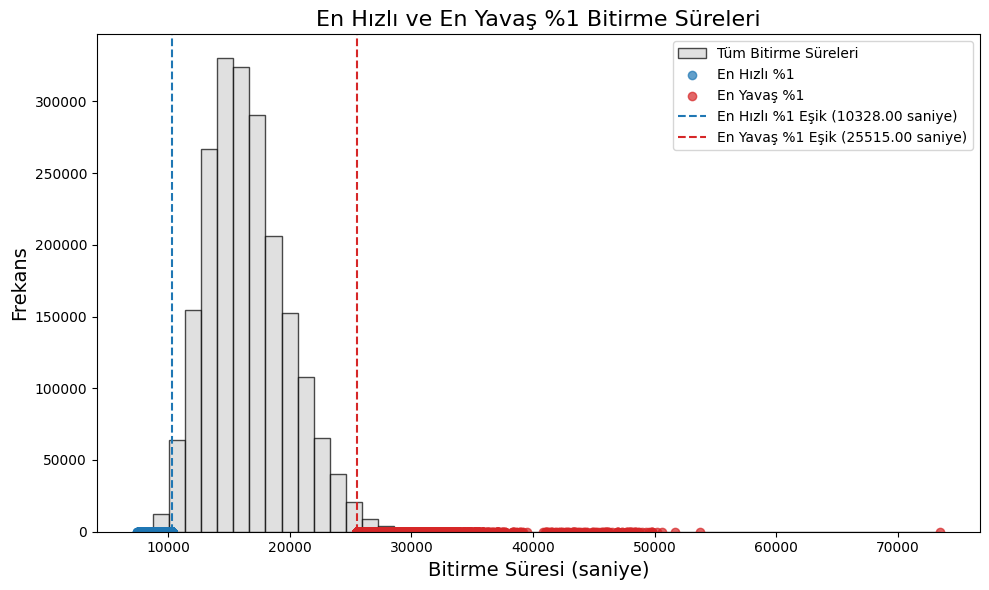

In [34]:
# Grafik olu≈üturma
plt.figure(figsize=(10, 6))
plt.hist(df["Finish"], bins=50, color='lightgray', edgecolor='black', alpha=0.7, label="T√ºm Bitirme S√ºreleri")

# En hƒ±zlƒ± %1 ve en yava≈ü %1 i√ßin i≈üaretleme
plt.scatter(fastest_1_percent["Finish"], [1]*len(fastest_1_percent), color='tab:blue', label="En Hƒ±zlƒ± %1", alpha=0.7)
plt.scatter(slowest_1_percent["Finish"], [1]*len(slowest_1_percent), color='tab:red', label="En Yava≈ü %1", alpha=0.7)

# Ortalama s√ºreleri ekleme
plt.axvline(x=lower_threshold, color='tab:blue', linestyle='--', label=f'En Hƒ±zlƒ± %1 E≈üik ({lower_threshold:.2f} saniye)')
plt.axvline(x=upper_threshold, color='tab:red', linestyle='--', label=f'En Yava≈ü %1 E≈üik ({upper_threshold:.2f} saniye)')

plt.title("En Hƒ±zlƒ± ve En Yava≈ü %1 Bitirme S√ºreleri", fontsize=16)
plt.xlabel("Bitirme S√ºresi (saniye)", fontsize=14)
plt.ylabel("Frekans", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


## 4.2 En Hƒ±zlƒ± ve En Yava≈ü Ko≈üucularƒ±n Yarƒ±≈ü Bazƒ±nda Performans Kar≈üƒ±la≈ütƒ±rmasƒ±

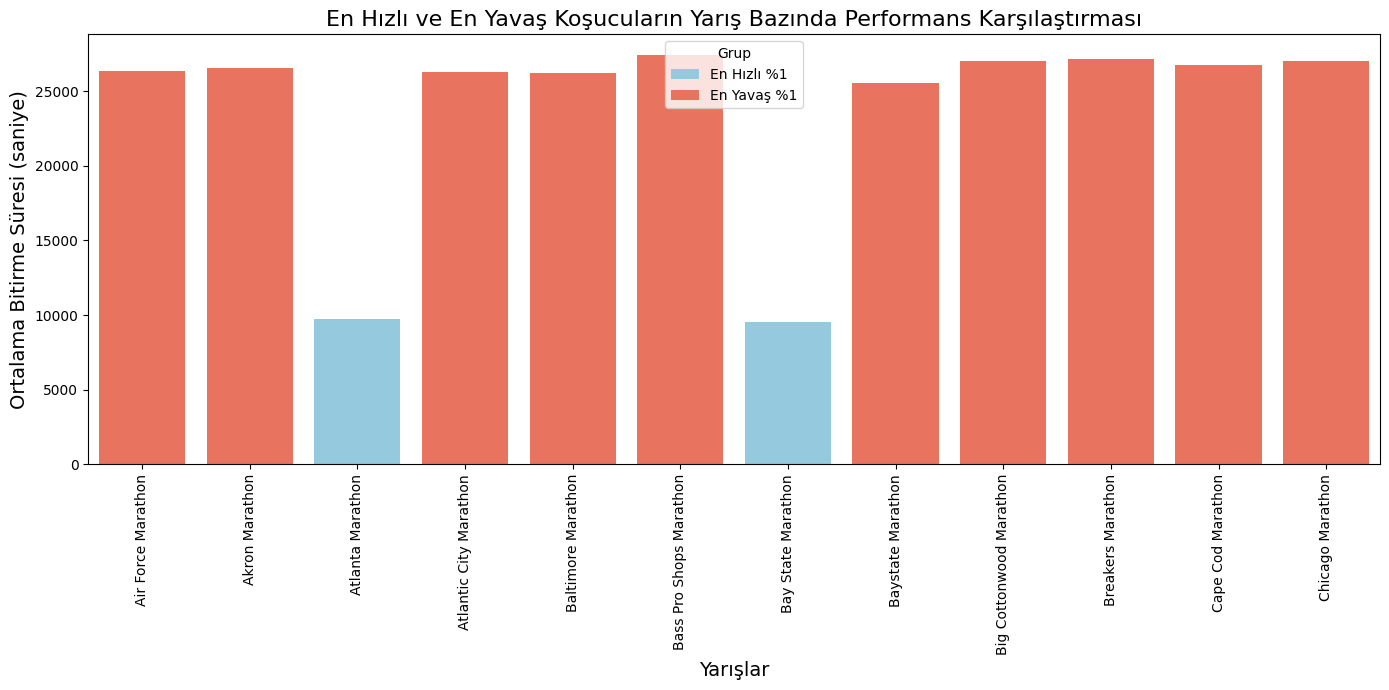

In [35]:
fastest_1_percent_race = fastest_1_percent.groupby('Race')['Finish'].mean().reset_index().head(10)
slowest_1_percent_race = slowest_1_percent.groupby('Race')['Finish'].mean().reset_index().head(10)

# G√∂rselle≈ütirme: En hƒ±zlƒ± ve en yava≈ü ko≈üucularƒ±n yarƒ±≈ülardaki performans farklarƒ±
plt.figure(figsize=(14, 7))

# En hƒ±zlƒ± ko≈üucularƒ±n yarƒ±≈ülardaki bitirme s√ºrelerini √ßiziyoruz
sns.barplot(x='Race', y='Finish', data=fastest_1_percent_race, color='skyblue', label='En Hƒ±zlƒ± %1')

# En yava≈ü ko≈üucularƒ±n yarƒ±≈ülardaki bitirme s√ºrelerini √ßiziyoruz
sns.barplot(x='Race', y='Finish', data=slowest_1_percent_race, color='tomato', label='En Yava≈ü %1')

plt.title('En Hƒ±zlƒ± ve En Yava≈ü Ko≈üucularƒ±n Yarƒ±≈ü Bazƒ±nda Performans Kar≈üƒ±la≈ütƒ±rmasƒ±', fontsize=16)
plt.xlabel('Yarƒ±≈ülar', fontsize=14)
plt.ylabel('Ortalama Bitirme S√ºresi (saniye)', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Grup')
plt.tight_layout()
plt.show()

## 4.3 Ya≈ü ve Cinsiyete G√∂re En Hƒ±zlƒ± %1 Ko≈üucularƒ±n Performansƒ±

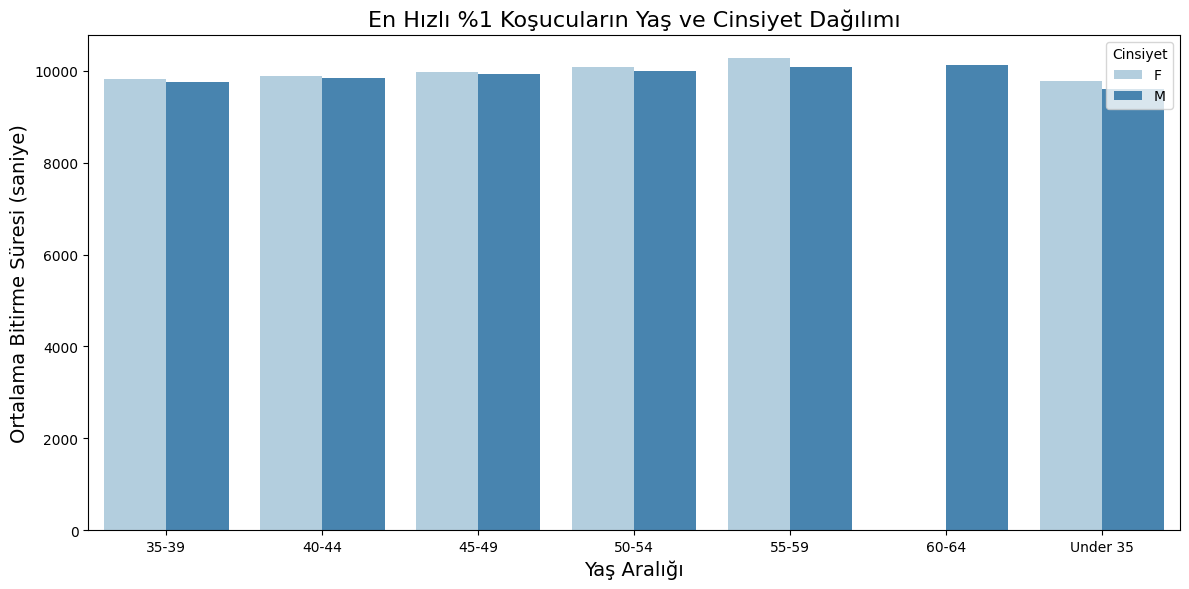

In [36]:
fastest_1_percent_age_gender = fastest_1_percent.groupby(['Age Bracket', 'Gender'])['Finish'].mean().reset_index()

# G√∂rselle≈ütirme: Ya≈ü ve Cinsiyete G√∂re En Hƒ±zlƒ± %1 Ko≈üucularƒ±n Performansƒ±
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Bracket', y='Finish', hue='Gender', data=fastest_1_percent_age_gender, palette='Blues')

plt.title('En Hƒ±zlƒ± %1 Ko≈üucularƒ±n Ya≈ü ve Cinsiyet Daƒüƒ±lƒ±mƒ±', fontsize=16)
plt.xlabel('Ya≈ü Aralƒ±ƒüƒ±', fontsize=14)
plt.ylabel('Ortalama Bitirme S√ºresi (saniye)', fontsize=14)
plt.legend(title='Cinsiyet')
plt.tight_layout()
plt.show()

## 4.4 Ya≈ü Gruplarƒ±na G√∂re En Yava≈ü %1 Ko≈üucularƒ±n Performansƒ±

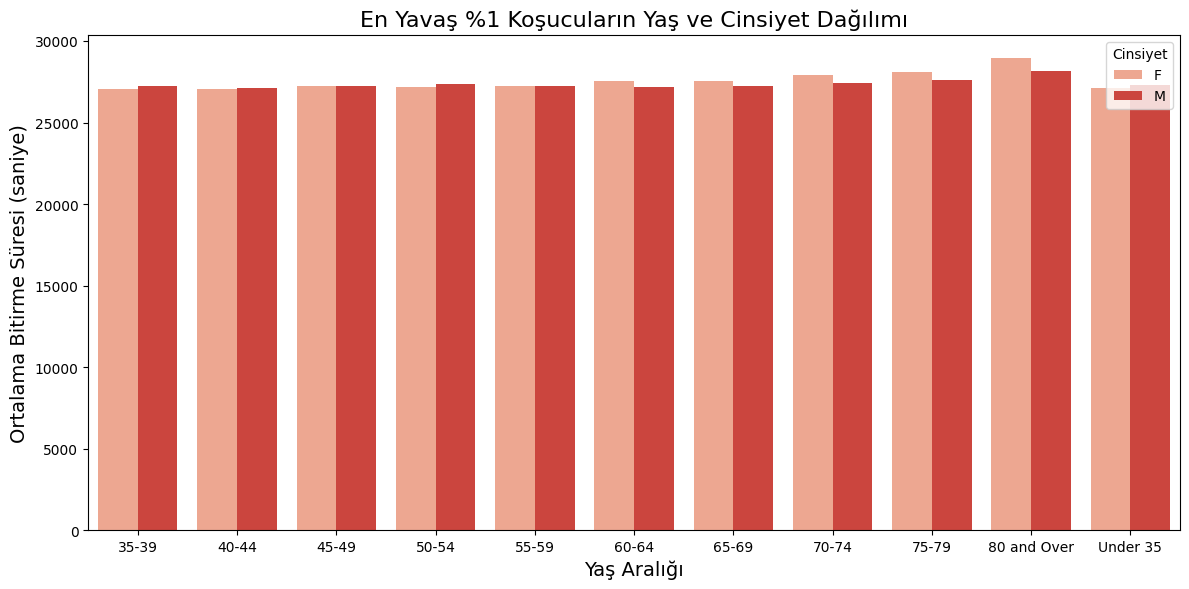

In [37]:
slowest_1_percent_age_gender = slowest_1_percent.groupby(['Age Bracket', 'Gender'])['Finish'].mean().reset_index()

# G√∂rselle≈ütirme: Ya≈ü ve Cinsiyete G√∂re En Yava≈ü %1 Ko≈üucularƒ±n Performansƒ±
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Bracket', y='Finish', hue='Gender', data=slowest_1_percent_age_gender, palette='Reds')

plt.title('En Yava≈ü %1 Ko≈üucularƒ±n Ya≈ü ve Cinsiyet Daƒüƒ±lƒ±mƒ±', fontsize=16)
plt.xlabel('Ya≈ü Aralƒ±ƒüƒ±', fontsize=14)
plt.ylabel('Ortalama Bitirme S√ºresi (saniye)', fontsize=14)
plt.legend(title='Cinsiyet')
plt.tight_layout()
plt.show()

# üéØ 5. Korelasyon ve Etkile≈üim Analizleri

## 5.1 Aykƒ±rƒ± Deƒüerler ve Korelasyonlar

In [38]:
# Orijinal veri k√ºmesinde Pearson ve Spearman Korelasyonlarƒ±
pearson_corr = df['Age'].corr(df['Finish'], method='pearson')
spearman_corr = df['Age'].corr(df['Finish'], method='spearman')

print("Orijinal DataFrame (df):")
print(f"  Pearson Korelasyonu:  {pearson_corr:.3f}")
print(f"  Spearman Korelasyonu: {spearman_corr:.3f}\n")

# Aykƒ±rƒ± deƒüerlerin √ßƒ±karƒ±ldƒ±ƒüƒ± temizlenmi≈ü veri k√ºmesinde Korelasyonlar
pearson_corr_cleaned = df_cleaned['Age'].corr(df_cleaned['Finish'], method='pearson')
spearman_corr_cleaned = df_cleaned['Age'].corr(df_cleaned['Finish'], method='spearman')

print("Aykƒ±rƒ± Deƒüerler √áƒ±karƒ±lmƒ±≈ü DataFrame (df_cleaned):")
print(f"  Pearson Korelasyonu:  {pearson_corr_cleaned:.3f}")
print(f"  Spearman Korelasyonu: {spearman_corr_cleaned:.3f}\n")

# Winsorizing y√∂ntemi ile aykƒ±rƒ± deƒüerlerin sƒ±nƒ±rlandƒ±ƒüƒ± veri k√ºmesinde Korelasyonlar
pearson_corr_winsorized = df_winsorized['Age'].corr(df_winsorized['Finish'], method='pearson')
spearman_corr_winsorized = df_winsorized['Age'].corr(df_winsorized['Finish'], method='spearman')

print("Winsorized DataFrame (df_winsorized):")
print(f"  Pearson Korelasyonu:  {pearson_corr_winsorized:.3f}")
print(f"  Spearman Korelasyonu: {spearman_corr_winsorized:.3f}\n")

Orijinal DataFrame (df):
  Pearson Korelasyonu:  0.132
  Spearman Korelasyonu: 0.102

Aykƒ±rƒ± Deƒüerler √áƒ±karƒ±lmƒ±≈ü DataFrame (df_cleaned):
  Pearson Korelasyonu:  0.122
  Spearman Korelasyonu: 0.096

Winsorized DataFrame (df_winsorized):
  Pearson Korelasyonu:  0.132
  Spearman Korelasyonu: 0.102



## 5.2 Sayƒ±sal S√ºtunlar Arasƒ±ndaki Korelasyon

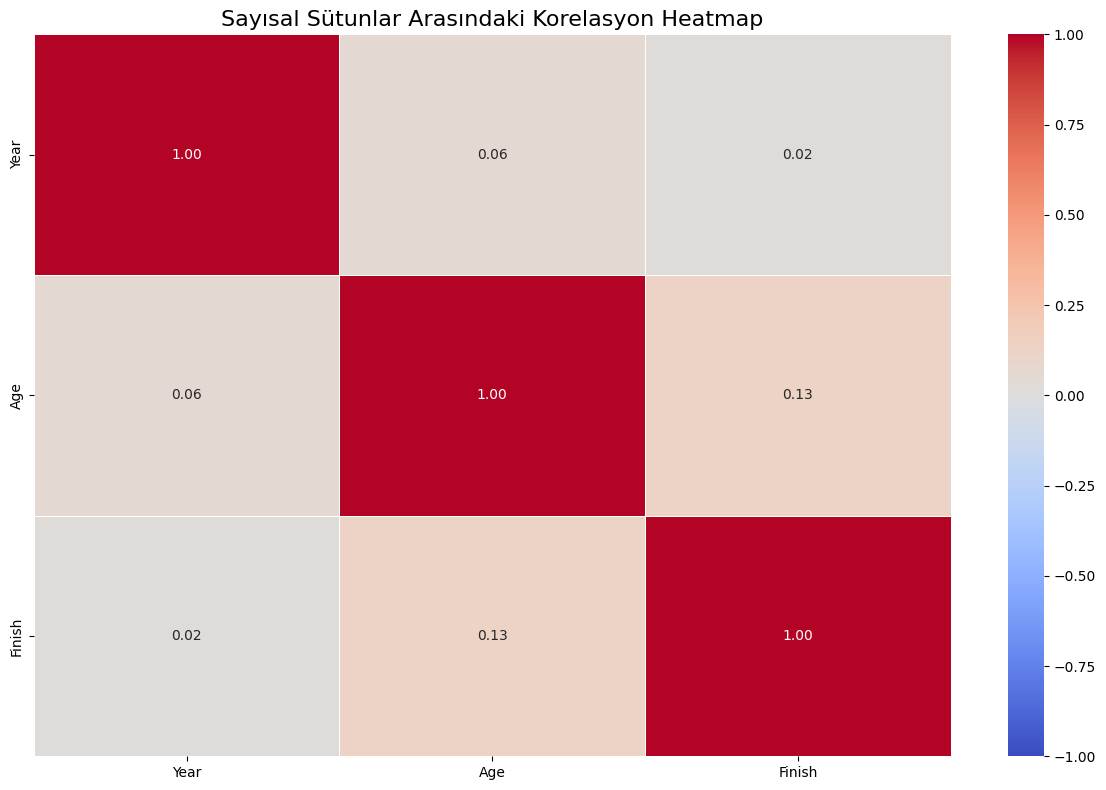

In [39]:
# Sayƒ±sal s√ºtunlar arasƒ±ndaki korelasyon matrisini hesaplama
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()

# Korelasyon Heatmap G√∂rselle≈ütirmesi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Sayƒ±sal S√ºtunlar Arasƒ±ndaki Korelasyon Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

## 5.3 Cinsiyetin Bitirme S√ºresi √úzerindeki Etkisi

In [40]:
from scipy.stats import f_oneway

# Cinsiyetin bitirme s√ºresi √ºzerindeki etkisini incelemek i√ßin ANOVA testi
def gender_anova(dataframe, label):
    male_finish = dataframe[dataframe['Gender'] == 'M']['Finish']
    female_finish = dataframe[dataframe['Gender'] == 'F']['Finish']
    
    # ANOVA testi
    anova_result = f_oneway(male_finish, female_finish)
    
    print(f"{label} - Cinsiyetin Bitirme S√ºresi √úzerindeki Etkisi (ANOVA p-deƒüeri): {anova_result.pvalue:.4f}")

# Her bir veri seti i√ßin testleri √ßalƒ±≈ütƒ±r
gender_anova(df, "Orijinal Veri (df)")
gender_anova(df_cleaned, "Aykƒ±rƒ± Deƒüerleri √áƒ±karƒ±lmƒ±≈ü Veri (df_cleaned)")
gender_anova(df_winsorized, "Winsorized Veri (df_winsorized)")

Orijinal Veri (df) - Cinsiyetin Bitirme S√ºresi √úzerindeki Etkisi (ANOVA p-deƒüeri): 0.0000
Aykƒ±rƒ± Deƒüerleri √áƒ±karƒ±lmƒ±≈ü Veri (df_cleaned) - Cinsiyetin Bitirme S√ºresi √úzerindeki Etkisi (ANOVA p-deƒüeri): 0.0000
Winsorized Veri (df_winsorized) - Cinsiyetin Bitirme S√ºresi √úzerindeki Etkisi (ANOVA p-deƒüeri): 0.0000


## 5.4 Ya≈ü Aralƒ±ƒüƒ±nƒ±n Bitirme S√ºresi √úzerindeki Etkisi

In [41]:
# Ya≈ü aralƒ±klarƒ±na g√∂re bitirme s√ºresi analizi i√ßin ANOVA testi
def age_bracket_anova(dataframe, label):
    age_brackets = dataframe['Age Bracket'].unique()
    age_grouped = [dataframe[dataframe['Age Bracket'] == age]['Finish'] for age in age_brackets]
    
    # ANOVA testi
    anova_result = f_oneway(*age_grouped)
    
    print(f"{label} - Ya≈ü Aralƒ±ƒüƒ±nƒ±n Bitirme S√ºresi √úzerindeki Etkisi (ANOVA p-deƒüeri): {anova_result.pvalue:.4f}")

# Her bir veri seti i√ßin √ßalƒ±≈ütƒ±r
age_bracket_anova(df, "Orijinal Veri (df)")
age_bracket_anova(df_cleaned, "Aykƒ±rƒ± Deƒüerleri √áƒ±karƒ±lmƒ±≈ü Veri (df_cleaned)")
age_bracket_anova(df_winsorized, "Winsorized Veri (df_winsorized)")

Orijinal Veri (df) - Ya≈ü Aralƒ±ƒüƒ±nƒ±n Bitirme S√ºresi √úzerindeki Etkisi (ANOVA p-deƒüeri): 0.0000
Aykƒ±rƒ± Deƒüerleri √áƒ±karƒ±lmƒ±≈ü Veri (df_cleaned) - Ya≈ü Aralƒ±ƒüƒ±nƒ±n Bitirme S√ºresi √úzerindeki Etkisi (ANOVA p-deƒüeri): 0.0000
Winsorized Veri (df_winsorized) - Ya≈ü Aralƒ±ƒüƒ±nƒ±n Bitirme S√ºresi √úzerindeki Etkisi (ANOVA p-deƒüeri): 0.0000


# üéØ 6. K√ºmelemenin Derinlemesine ƒ∞ncelenmesi

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## 6.1 Orijinal Veri ile K√ºmeleme

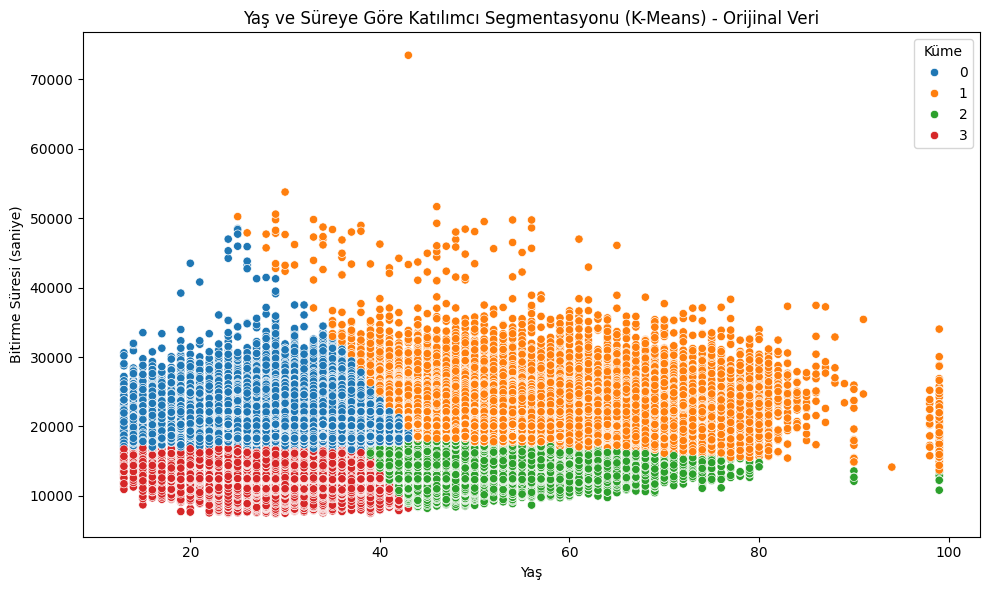

In [43]:
# Veriyi Se√ßme ve √ñl√ßeklendirme
X_cluster = df[['Age', 'Finish']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# K-Means Modeli ve K√ºmeleme
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# G√∂rselle≈ütirme: Orijinal Veri K√ºmeleme Sonu√ßlarƒ±
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Finish', hue='cluster', palette='tab10')
plt.title("Ya≈ü ve S√ºreye G√∂re Katƒ±lƒ±mcƒ± Segmentasyonu (K-Means) - Orijinal Veri")
plt.xlabel("Ya≈ü")
plt.ylabel("Bitirme S√ºresi (saniye)")
plt.legend(title='K√ºme', loc='upper right')
plt.tight_layout()
plt.show()

üìä Orijinal Veri K√ºme ƒ∞statistikleri:
            Age                   Finish                 
          mean median   count      mean   median   count
cluster                                                 
0        32.37   33.0  488980  19433.75  18901.0  488980
1        53.10   52.0  299820  20657.31  20136.0  299820
2        48.06   47.0  611091  14879.03  15023.0  611091
3        31.28   31.0  653475  13969.08  14155.0  653475
üìä Orijinal Veride Her K√ºmenin Cinsiyet Daƒüƒ±lƒ±mƒ±:
 Gender        F       M
cluster                
0        294504  194476
1        141469  158351
2        193517  417574
3        266118  387357


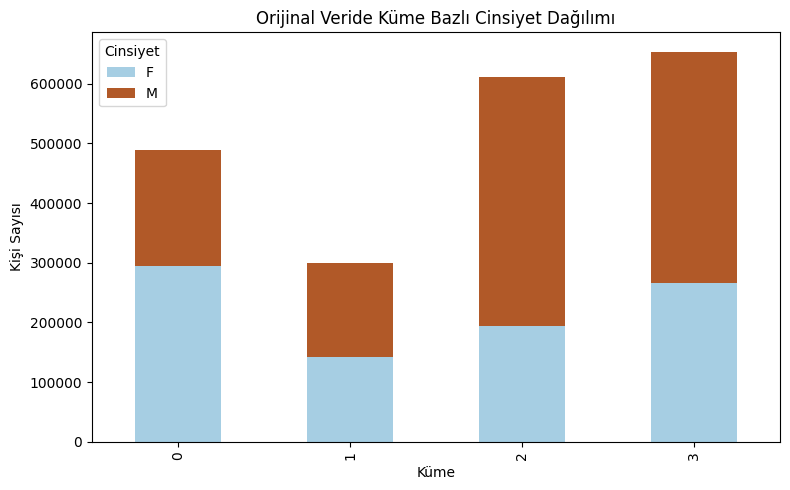

In [44]:
# K√ºme ƒ∞statistikleri: Orijinal Veri
cluster_summary = df.groupby('cluster')[['Age', 'Finish']].agg(['mean', 'median', 'count']).round(2)
print("üìä Orijinal Veri K√ºme ƒ∞statistikleri:\n", cluster_summary)

# Cinsiyet Daƒüƒ±lƒ±mƒ±: Orijinal Veri
gender_dist_original = df.groupby(['cluster', 'Gender']).size().unstack()
print("üìä Orijinal Veride Her K√ºmenin Cinsiyet Daƒüƒ±lƒ±mƒ±:\n", gender_dist_original)

# Cinsiyet Daƒüƒ±lƒ±mƒ± Grafiƒüi: Orijinal Veri
gender_dist_original.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Paired')
plt.title("Orijinal Veride K√ºme Bazlƒ± Cinsiyet Daƒüƒ±lƒ±mƒ±")
plt.xlabel("K√ºme")
plt.ylabel("Ki≈üi Sayƒ±sƒ±")
plt.legend(title="Cinsiyet")
plt.tight_layout()
plt.show()

## 6.2 Temizlenmi≈ü Veri ile K√ºmeleme

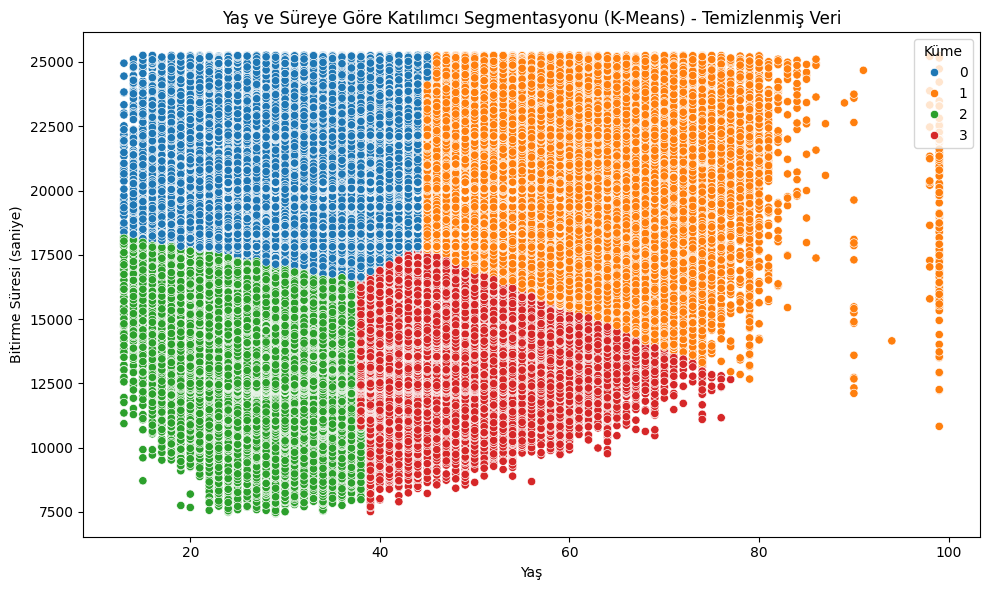

In [45]:
# Temizlenmi≈ü Veriyi Se√ßme ve √ñl√ßeklendirme
X_cluster_cleaned = df_cleaned[['Age', 'Finish']].copy()
X_scaled_cleaned = scaler.fit_transform(X_cluster_cleaned)

# K-Means Modeli ve K√ºmeleme
kmeans_cleaned = KMeans(n_clusters=4, random_state=42)
df_cleaned = df_cleaned.copy()  # .copy() kullanarak bir kopya alƒ±yoruz
df_cleaned['cluster'] = kmeans_cleaned.fit_predict(X_scaled_cleaned)

# G√∂rselle≈ütirme: Temizlenmi≈ü Veri K√ºmeleme Sonu√ßlarƒ±
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Age', y='Finish', hue='cluster', palette='tab10')
plt.title("Ya≈ü ve S√ºreye G√∂re Katƒ±lƒ±mcƒ± Segmentasyonu (K-Means) - Temizlenmi≈ü Veri")
plt.xlabel("Ya≈ü")
plt.ylabel("Bitirme S√ºresi (saniye)")
plt.legend(title='K√ºme', loc='upper right')
plt.tight_layout()
plt.show()



üìä Temizlenmi≈ü Veri K√ºme ƒ∞statistikleri:
            Age                   Finish                 
          mean median   count      mean   median   count
cluster                                                 
0        33.98   34.0  507458  19556.58  19122.0  507458
1        54.83   54.0  313792  19364.20  19002.0  313792
2        29.63   29.0  577508  14226.06  14373.0  577508
3        45.85   44.0  630460  14354.77  14402.0  630460

üìä Temizlenmi≈ü Veride Her K√ºmenin Cinsiyet Daƒüƒ±lƒ±mƒ±:
 Gender        F       M
cluster                
0        303530  203928
1        130644  183148
2        250083  327425
3        195901  434559


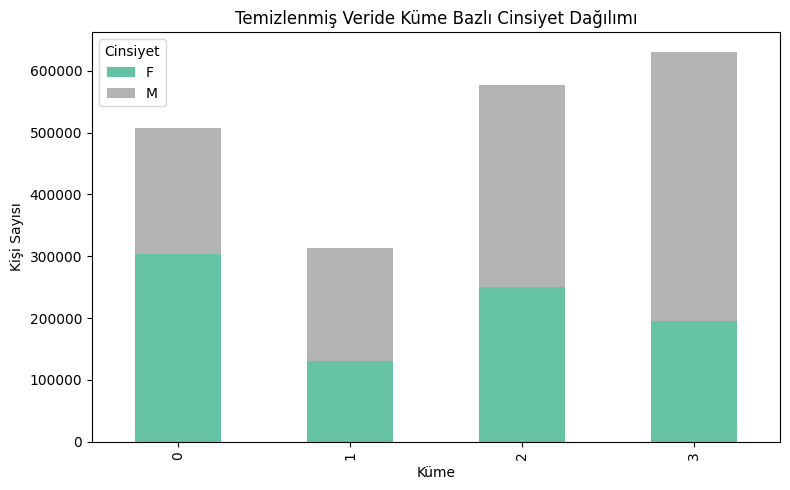

In [46]:
# K√ºme ƒ∞statistikleri: Temizlenmi≈ü Veri
cluster_summary_cleaned = df_cleaned.groupby('cluster')[['Age', 'Finish']].agg(['mean', 'median', 'count']).round(2)
print("\nüìä Temizlenmi≈ü Veri K√ºme ƒ∞statistikleri:\n", cluster_summary_cleaned)

# Cinsiyet Daƒüƒ±lƒ±mƒ±: Temizlenmi≈ü Veri
gender_dist_cleaned = df_cleaned.groupby(['cluster', 'Gender']).size().unstack()
print("\nüìä Temizlenmi≈ü Veride Her K√ºmenin Cinsiyet Daƒüƒ±lƒ±mƒ±:\n", gender_dist_cleaned)

# Cinsiyet Daƒüƒ±lƒ±mƒ± Grafiƒüi: Temizlenmi≈ü Veri
gender_dist_cleaned.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')
plt.title("Temizlenmi≈ü Veride K√ºme Bazlƒ± Cinsiyet Daƒüƒ±lƒ±mƒ±")
plt.xlabel("K√ºme")
plt.ylabel("Ki≈üi Sayƒ±sƒ±")
plt.legend(title="Cinsiyet")
plt.tight_layout()
plt.show()

## 6.3 Winsorized Veri ile K√ºmeleme

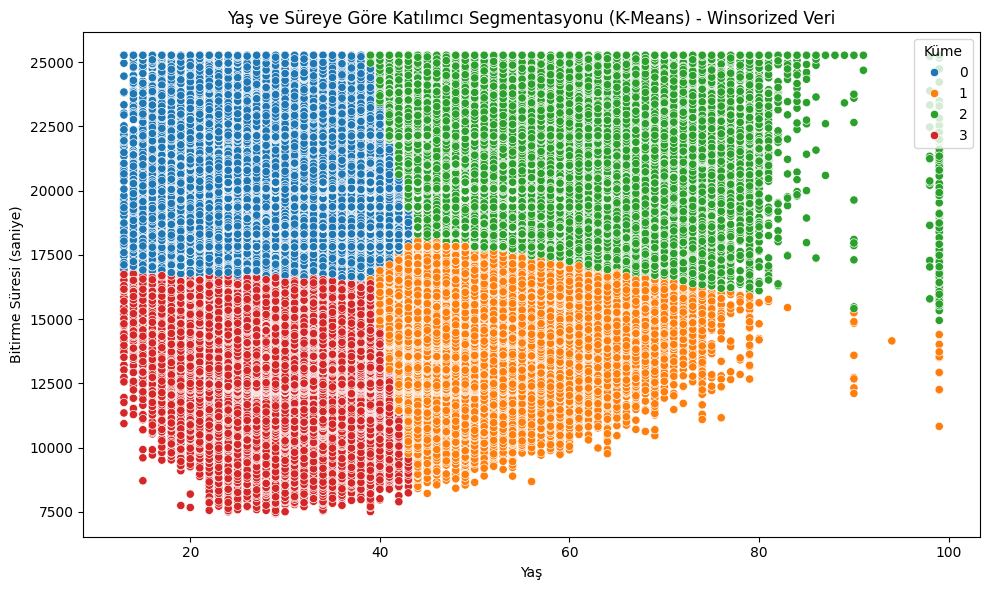

In [47]:
# Winsorized Veriyi Se√ßme ve √ñl√ßeklendirme
X_cluster_winsorized = df_winsorized[['Age', 'Finish']].copy()
X_scaled_winsorized = scaler.fit_transform(X_cluster_winsorized)

# K-Means Modeli ve K√ºmeleme
kmeans_winsorized = KMeans(n_clusters=4, random_state=42)
df_winsorized = df_winsorized.copy()  # .copy() kullanarak bir kopya alƒ±yoruz
df_winsorized['cluster'] = kmeans_winsorized.fit_predict(X_scaled_winsorized)

# G√∂rselle≈ütirme: Winsorized Veri K√ºmeleme Sonu√ßlarƒ±
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_winsorized, x='Age', y='Finish', hue='cluster', palette='tab10')
plt.title("Ya≈ü ve S√ºreye G√∂re Katƒ±lƒ±mcƒ± Segmentasyonu (K-Means) - Winsorized Veri")
plt.xlabel("Ya≈ü")
plt.ylabel("Bitirme S√ºresi (saniye)")
plt.legend(title='K√ºme', loc='upper right')
plt.tight_layout()
plt.show()


üìä Winsorized Veri K√ºme ƒ∞statistikleri:
            Age                   Finish                 
          mean median   count      mean   median   count
cluster                                                 
0        32.29   33.0  501988  19288.42  18772.0  501988
1        48.64   48.0  579752  14856.54  14984.0  579752
2        52.71   51.0  303395  20617.68  20182.0  303395
3        31.66   32.0  668231  13955.23  14154.0  668231

üìä Winsorized Veride Her K√ºmenin Cinsiyet Daƒüƒ±lƒ±mƒ±:
 Gender        F       M
cluster                
0        301364  200624
1        179294  400458
2        145025  158370
3        269925  398306


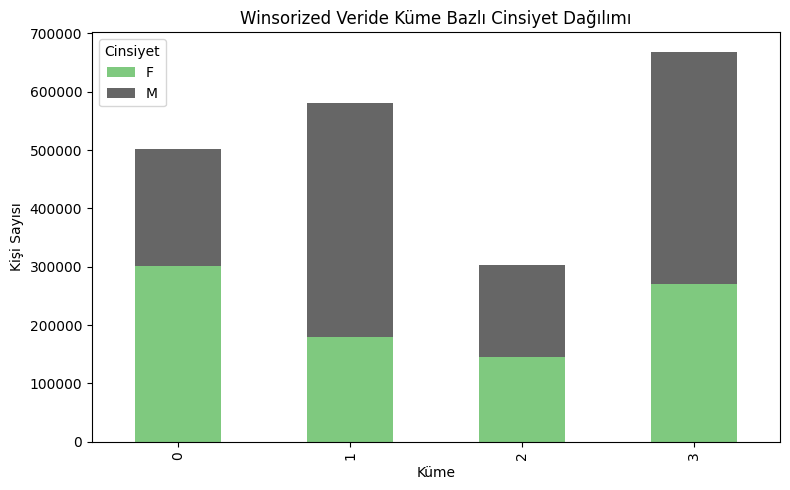

In [48]:
# K√ºme ƒ∞statistikleri: Winsorized Veri
cluster_summary_winsorized = df_winsorized.groupby('cluster')[['Age', 'Finish']].agg(['mean', 'median', 'count']).round(2)
print("\nüìä Winsorized Veri K√ºme ƒ∞statistikleri:\n", cluster_summary_winsorized)

# Cinsiyet Daƒüƒ±lƒ±mƒ±: Winsorized Veri
gender_dist_winsorized = df_winsorized.groupby(['cluster', 'Gender']).size().unstack()
print("\nüìä Winsorized Veride Her K√ºmenin Cinsiyet Daƒüƒ±lƒ±mƒ±:\n", gender_dist_winsorized)

# Cinsiyet Daƒüƒ±lƒ±mƒ± Grafiƒüi: Winsorized Veri
gender_dist_winsorized.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Accent')
plt.title("Winsorized Veride K√ºme Bazlƒ± Cinsiyet Daƒüƒ±lƒ±mƒ±")
plt.xlabel("K√ºme")
plt.ylabel("Ki≈üi Sayƒ±sƒ±")
plt.legend(title="Cinsiyet")
plt.tight_layout()
plt.show()

## 6.4 K√ºmeleme Sonrasƒ± Yarƒ±≈ü Daƒüƒ±lƒ±mƒ±

In [49]:
# K√ºmeleme Sonrasƒ± Yarƒ±≈ü Daƒüƒ±lƒ±mƒ±
race_cluster_summary = df.groupby(['cluster', 'Race']).size().unstack().head(10)
print("\nüìä K√ºmeleme Sonrasƒ± Yarƒ±≈ülara G√∂re K√ºme Analizi:\n", race_cluster_summary.T)



üìä K√ºmeleme Sonrasƒ± Yarƒ±≈ülara G√∂re K√ºme Analizi:
 cluster                    0     1     2     3
Race                                          
Air Force Marathon      6887  5020  5289  5225
Akron Marathon          3080  1648  4179  4165
Atlanta Marathon         807   347   855  1077
Atlantic City Marathon  1413  1011  2217  2095
Baltimore Marathon      6901  3250  6277  9675
...                      ...   ...   ...   ...
Two Cities Marathon      299   181   421   440
VENTURA MARATHON         896   651  1813  1802
Via Marathon             663   589  3299  3128
WhistleStop Marathon     216    54   217   704
Wineglass Marathon      2777  2023  6733  5591

[96 rows x 4 columns]


## 6.5 Zaman Serisi Analizi ile K√ºme Daƒüƒ±lƒ±mƒ±

In [50]:
# Zaman serisi analizi 
time_cluster_analysis = df.groupby(['Year', 'cluster']).size().unstack()
print("\nüìä Zaman ƒ∞√ßindeki K√ºme Daƒüƒ±lƒ±mƒ±:\n", time_cluster_analysis)


üìä Zaman ƒ∞√ßindeki K√ºme Daƒüƒ±lƒ±mƒ±:
 cluster      0      1      2      3
Year                               
2010     50934  26217  61030  68724
2011     54613  27047  61644  72956
2012     44166  20966  50174  63581
2013     54489  29710  72596  78481
2014     53046  31680  68913  70877
2015     51712  33364  64258  62903
2016     48533  32829  59641  60633
2017     46791  34735  57024  55566
2018     43484  31603  57385  59266
2019     41212  31669  58426  60488


# 6.6. K√ºme Bazƒ±nda Varyans ve Performans Analizi

In [51]:
# Her bir k√ºme i√ßin varyansƒ±n a√ßƒ±klanma oranƒ±
cluster_variance = df.groupby('cluster').agg({'Finish': 'var'}).round(2)
print(f"\nüìä K√ºme Ba≈üƒ±na Varyans Daƒüƒ±lƒ±mƒ±:\n", cluster_variance)


üìä K√ºme Ba≈üƒ±na Varyans Daƒüƒ±lƒ±mƒ±:
              Finish
cluster            
0        4744682.28
1        6379735.55
2        3089766.66
3        3015610.25


In [52]:
# K√ºme Performans Kar≈üƒ±la≈ütƒ±rmasƒ±: K√ºme bazƒ±nda performans analizi
def compare_cluster_performance(df):
    cluster_performance = df.groupby('cluster')['Finish'].agg(['mean', 'std', 'min', 'max'])
    print(f"üìä K√ºme Bazƒ±nda Performans Kar≈üƒ±la≈ütƒ±rmasƒ±:\n", cluster_performance)

compare_cluster_performance(df)


üìä K√ºme Bazƒ±nda Performans Kar≈üƒ±la≈ütƒ±rmasƒ±:
                  mean          std    min    max
cluster                                         
0        19433.748630  2178.229161  16586  48485
1        20657.312938  2525.813839  13723  73460
2        14879.029999  1757.773211   8217  18311
3        13969.084520  1736.551251   7425  17054


# 6.7. Grup Bazlƒ± Hedef Belirleme

### Grup Bazlƒ± Hedef Belirleme (K√ºmelere G√∂re)
Her k√ºmenin ortalama s√ºresi √ºzerinden ko≈üucuya √∂zel hedef √∂nerebilirsin

In [53]:
# Her k√ºme i√ßin ortalama bitirme s√ºresini hesapla
cluster_means = df_cleaned.groupby('cluster')['Finish'].mean()

def suggest_cluster_goal(df, runner_id):
    runner = df.iloc[runner_id]
    cluster = runner['cluster']
    current_time = runner['Finish']
    target_time = cluster_means[cluster] * 0.95  # √ñrneƒüin %5 geli≈üim hedefi

    print(f"Ko≈üucu {runner_id} (K√ºme {cluster}):")
    print(f"Mevcut s√ºresi: {current_time:.2f} saniye")
    print(f"K√ºme ortalamasƒ±: {cluster_means[cluster]:.2f} saniye")
    print(f"Yeni hedef s√ºresi (%5 daha iyi): {target_time:.2f} saniye")
    
    if current_time > target_time:
        print(f"‚è± Geli≈ümek i√ßin {current_time - target_time:.2f} saniye iyile≈ütirme gerekiyor.")
    else:
        print("üéâ Bu hedefi zaten ge√ßtiniz!")

## √ñrnek Veri ve Kullanƒ±m

In [54]:
# √ñrnek kullanƒ±m
suggest_cluster_goal(df_cleaned, 150000)

Ko≈üucu 150000 (K√ºme 1):
Mevcut s√ºresi: 20420.00 saniye
K√ºme ortalamasƒ±: 19364.20 saniye
Yeni hedef s√ºresi (%5 daha iyi): 18395.99 saniye
‚è± Geli≈ümek i√ßin 2024.01 saniye iyile≈ütirme gerekiyor.
